# Instalacion de modulos

In [1]:
from wget import download
import pandas as pd
from os import path
import numpy as np

In [2]:
import ydata_profiling as pp

# Descarga del dataset

In [3]:
if not path.exists("Calidad_de_agua_2021.csv"):
    download('https://raw.githubusercontent.com/joacoloza/tpFundamentos/main/Calidad_de_agua_2021.csv')
else:
    print('descargado already')

descargado already


In [4]:
df = pd.read_csv("Calidad_de_agua_2021.csv",delimiter= ';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   orden                    166 non-null    int64 
 1   sitios                   166 non-null    object
 2   codigo                   166 non-null    object
 3   fecha                    166 non-null    object
 4   año                      166 non-null    int64 
 5   campaña                  166 non-null    object
 6   tem_agua                 166 non-null    object
 7   tem_aire                 162 non-null    object
 8   od                       166 non-null    object
 9   ph                       166 non-null    object
 10  olores                   166 non-null    object
 11  color                    166 non-null    object
 12  espumas                  166 non-null    object
 13  mat_susp                 166 non-null    object
 14  colif_fecales_ufc_100ml  166 non-null    o

podemos ver que muchos datos cuantitativos estan como object lo que quiere decir que nuestros cuantitativos son string por lo tanto vamos a tener que modificar esos valores.
Primero que nada vamos a definir lo que son nans, en este caso podriamos interpretar un nan como "no se midió"


# Hipotesis

- ## Temperatura sobre los niveles de oxigeno disuelto
- ## La calidad del agua varia segun la temporada
- ## La presencia o ausencia de los factores olores, color, espumas y materia suspendida  tiene efecto sobre los valores de ICA
- ## La presencia de las variables de contaminacion quimica "cr total mg l" y "cd total mg l" afectan negativamente al ICA

# Data cleaning

Empezamos con la limpieza de datos, lo que vamos es cambiar todo lo que tenga un valor 'no se midio' con una nan, luego vamos a borrar aquellas filas que tengan los datos para las mediciones con nan, luego vamos a reemplazar los valores que tienen rangos elminando el signo y dejando solo el valor.
luego vamos a pasar los datos necesarios de object a valores numericos

## Definicion y manejo de datos nulos

In [5]:
df_cleaned = df.replace('no se midió', np.nan)
df_cleaned

,orden,sitios,codigo,fecha,año,campaña,tem_agua,tem_aire,od,ph,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
0,1,Canal Villanueva y Río Luján,TI001,24/2/2021,2021,verano,25.6,27,3.91,6.96,...,<2.0,<30,60,<100,<5.0,<0.001,0,<0.15,42,Extremadamente deteriorada
1,1,Canal Villanueva y Río Luján,TI001,19/5/2021,2021,otoño,15.6,13,8.28,6.79,...,4.1,<2.0,<30,110,<100,<0.005,<0.001,< 10.000,48,Muy deteriorada
2,1,Canal Villanueva y Río Luján,TI001,25/8/2021,2021,invierno,14.8,13,9.9,7.09,...,<2.0,<30,27,<100,<0.005,<0.001,<0.010,<0.20,64,Muy deteriorada
3,1,Canal Villanueva y Río Luján,TI001,27/10/2021,2021,primavera,24.4,29,7.28,6.91,...,<2.0,31,45,<100,<0.005,<0.001,0.00356,<0.20,55,Muy deteriorada
4,2,Río Lujan y Arroyo Caraguatá,TI006,24/2/2021,2021,verano,25.7,26,4.31,7.4,...,3.7,<30,31,<100,<5.0,<0.001,0.005,<0.15,49,Muy deteriorada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,41,Playa La Balandra,BS093,24/2/2021,2021,verano,20,26,4.89,7.75,...,2.7,<30,5.3,<100,<5.0,<0.001,0.006,<0.15,46,Muy deteriorada
162,41,Playa La Balandra,BS093,19/5/2021,2021,otoño,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,41,Playa La Balandra,BS093,25/8/2021,2021,invierno,7,9,9.99,9.22,...,5,<30,75,<100,<0.005,<0.001,<0.010,<0.20,46,Muy deteriorada
164,42,Playa La Balandra,BS093,25/8/2021,2021,invierno,7,8,10.7,9.19,...,7.3,37,75,<100,<0.005,<0.001,<0.010,<0.20,43,Extremadamente deteriorada


Eliminar columnas que no vamos a usar en el analisis

In [6]:
df_cleaned = df_cleaned.drop(columns=['orden', 'año', 'codigo'])
df_cleaned

,sitios,fecha,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
0,Canal Villanueva y Río Luján,24/2/2021,verano,25.6,27,3.91,6.96,Ausencia,Ausencia,Ausencia,...,<2.0,<30,60,<100,<5.0,<0.001,0,<0.15,42,Extremadamente deteriorada
1,Canal Villanueva y Río Luján,19/5/2021,otoño,15.6,13,8.28,6.79,Ausencia,Ausencia,Ausencia,...,4.1,<2.0,<30,110,<100,<0.005,<0.001,< 10.000,48,Muy deteriorada
2,Canal Villanueva y Río Luján,25/8/2021,invierno,14.8,13,9.9,7.09,Ausencia,Ausencia,Ausencia,...,<2.0,<30,27,<100,<0.005,<0.001,<0.010,<0.20,64,Muy deteriorada
3,Canal Villanueva y Río Luján,27/10/2021,primavera,24.4,29,7.28,6.91,Ausencia,Ausencia,Ausencia,...,<2.0,31,45,<100,<0.005,<0.001,0.00356,<0.20,55,Muy deteriorada
4,Río Lujan y Arroyo Caraguatá,24/2/2021,verano,25.7,26,4.31,7.4,Ausencia,Presencia,Ausencia,...,3.7,<30,31,<100,<5.0,<0.001,0.005,<0.15,49,Muy deteriorada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Playa La Balandra,24/2/2021,verano,20,26,4.89,7.75,Ausencia,Ausencia,Ausencia,...,2.7,<30,5.3,<100,<5.0,<0.001,0.006,<0.15,46,Muy deteriorada
162,Playa La Balandra,19/5/2021,otoño,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,Playa La Balandra,25/8/2021,invierno,7,9,9.99,9.22,Ausencia,ausenca,Ausencia,...,5,<30,75,<100,<0.005,<0.001,<0.010,<0.20,46,Muy deteriorada
164,Playa La Balandra,25/8/2021,invierno,7,8,10.7,9.19,Ausencia,Ausencia,Ausencia,...,7.3,37,75,<100,<0.005,<0.001,<0.010,<0.20,43,Extremadamente deteriorada


Encontramos que hay registros donde no se encuentran mediciones asi que optamos por elimiar esos registros

---

Eliminamos el simbolo "<" de los rangos para que quede solo el numero


In [7]:
df_cleaned = df_cleaned.replace('(>|<)', '',regex = True)
df_cleaned

,sitios,fecha,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
0,Canal Villanueva y Río Luján,24/2/2021,verano,25.6,27,3.91,6.96,Ausencia,Ausencia,Ausencia,...,2.0,30,60,100,5.0,0.001,0,0.15,42,Extremadamente deteriorada
1,Canal Villanueva y Río Luján,19/5/2021,otoño,15.6,13,8.28,6.79,Ausencia,Ausencia,Ausencia,...,4.1,2.0,30,110,100,0.005,0.001,10.000,48,Muy deteriorada
2,Canal Villanueva y Río Luján,25/8/2021,invierno,14.8,13,9.9,7.09,Ausencia,Ausencia,Ausencia,...,2.0,30,27,100,0.005,0.001,0.010,0.20,64,Muy deteriorada
3,Canal Villanueva y Río Luján,27/10/2021,primavera,24.4,29,7.28,6.91,Ausencia,Ausencia,Ausencia,...,2.0,31,45,100,0.005,0.001,0.00356,0.20,55,Muy deteriorada
4,Río Lujan y Arroyo Caraguatá,24/2/2021,verano,25.7,26,4.31,7.4,Ausencia,Presencia,Ausencia,...,3.7,30,31,100,5.0,0.001,0.005,0.15,49,Muy deteriorada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Playa La Balandra,24/2/2021,verano,20,26,4.89,7.75,Ausencia,Ausencia,Ausencia,...,2.7,30,5.3,100,5.0,0.001,0.006,0.15,46,Muy deteriorada
162,Playa La Balandra,19/5/2021,otoño,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,Playa La Balandra,25/8/2021,invierno,7,9,9.99,9.22,Ausencia,ausenca,Ausencia,...,5,30,75,100,0.005,0.001,0.010,0.20,46,Muy deteriorada
164,Playa La Balandra,25/8/2021,invierno,7,8,10.7,9.19,Ausencia,Ausencia,Ausencia,...,7.3,37,75,100,0.005,0.001,0.010,0.20,43,Extremadamente deteriorada


Generamos un dataset de mapeo con coordenadas a partir de las ubicaciones descriptas en el dataset original, en este proceso nos dividimos el total de zonas entre los integrantes del grupo y buscamos sus coordenadas manualmente en google maps.

En las situaciones en que google maps nos daba una ubicacion que no estaba sobre el rio generabamos consensos para decidir la coordenada del rio mas cercana.

Hubieron dos zonas que no pudimos ubicar asi que las descartamos para el analisis geografico

Ahora vamos a cambiar los datos de object(strings) a datos numericos para poder trabajar con ellos

In [8]:

columnas_exlcuidas = ['sitios','campaña','olores','color','espumas','calidad_de_agua','mat_susp','fecha']

columnas_numericas = df_cleaned.drop(columns = columnas_exlcuidas).columns

df_cleaned[columnas_numericas] = df_cleaned[columnas_numericas].astype("float",errors="ignore")

df_cleaned.info()
df_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sitios                   166 non-null    object 
 1   fecha                    166 non-null    object 
 2   campaña                  166 non-null    object 
 3   tem_agua                 149 non-null    float64
 4   tem_aire                 137 non-null    float64
 5   od                       150 non-null    float64
 6   ph                       150 non-null    float64
 7   olores                   151 non-null    object 
 8   color                    151 non-null    object 
 9   espumas                  151 non-null    object 
 10  mat_susp                 151 non-null    object 
 11  colif_fecales_ufc_100ml  148 non-null    float64
 12  escher_coli_ufc_100ml    148 non-null    float64
 13  enteroc_ufc_100ml        148 non-null    float64
 14  nitrato_mg_l             1

,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica
count,149.000000,137.000000,150.000000,150.000000,148.000000,148.000000,148.000000,147.000000,151.000000,151.000000,147.000000,144.000000,150.000000,151.000000,150.000000,150.000000,151.000000,151.000000,150.000000,151.000000
mean,19.165772,19.194161,6.645200,7.582067,18790.540541,5197.263514,927.337838,4.232653,2.199338,0.564702,0.438299,5.007639,34.096000,30.688079,100.346000,21.199518,0.002395,0.020628,2.151333,44.894040
std,5.675621,8.044781,3.107303,0.731462,33067.157120,11284.350013,2571.965736,2.642569,4.137132,0.388602,0.317357,2.637388,22.327342,24.103435,32.276766,38.955087,0.003381,0.074078,3.937856,10.065222
min,7.000000,4.000000,0.590000,6.610000,100.000000,5.000000,2.000000,2.000000,0.050000,0.080000,0.100000,2.000000,2.000000,4.900000,6.900000,0.005000,0.001000,0.000000,0.150000,26.000000
25%,14.500000,12.600000,4.242500,6.977500,2000.000000,297.500000,63.750000,2.750000,0.400000,0.275000,0.255000,2.875000,30.000000,16.000000,100.000000,0.005000,0.001000,0.001000,0.162500,38.000000
50%,18.000000,18.000000,6.260000,7.475000,5050.000000,1260.000000,250.000000,3.700000,0.980000,0.460000,0.360000,4.750000,30.000000,30.000000,100.000000,0.005700,0.001000,0.010000,0.200000,43.000000
75%,24.700000,27.000000,8.797500,7.857500,16250.000000,4100.000000,800.000000,5.250000,2.550000,0.750000,0.520000,6.500000,41.750000,33.000000,100.000000,7.700000,0.001000,0.010000,0.200000,49.000000
max,28.000000,33.000000,15.200000,9.660000,190000.000000,70000.000000,28000.000000,22.100000,39.000000,2.500000,2.400000,14.000000,140.000000,210.000000,340.000000,100.000000,0.021000,0.840160,10.000000,80.000000


para trabajar con valores booleanos vamos a cambiar los valores de las columnas: olores,color,espumas,mat_susp por valores booleanos,True = prescencia, False = auscencia

In [9]:
columnas_a_cambiar = ['olores','color','espumas','mat_susp']

df_cleaned[columnas_a_cambiar] = df_cleaned[columnas_a_cambiar].replace('Ausencia',False).replace('Presencia',True).astype('bool')

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sitios                   166 non-null    object 
 1   fecha                    166 non-null    object 
 2   campaña                  166 non-null    object 
 3   tem_agua                 149 non-null    float64
 4   tem_aire                 137 non-null    float64
 5   od                       150 non-null    float64
 6   ph                       150 non-null    float64
 7   olores                   166 non-null    bool   
 8   color                    166 non-null    bool   
 9   espumas                  166 non-null    bool   
 10  mat_susp                 166 non-null    bool   
 11  colif_fecales_ufc_100ml  148 non-null    float64
 12  escher_coli_ufc_100ml    148 non-null    float64
 13  enteroc_ufc_100ml        148 non-null    float64
 14  nitrato_mg_l             1

Ahora vamos a eliminar aquellas filas que no tienen ninguna medicion realizada

In [10]:
df_cleaned = df_cleaned.dropna(subset = ['calidad_de_agua']) #si tiene nan en la columna borra la fila
df_cleaned.shape[0]

151

# Generacion de reporte automático

In [11]:
df_cleaned.describe()

,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica
count,149.000000,137.000000,150.000000,150.000000,148.000000,148.000000,148.000000,147.000000,151.000000,151.000000,147.000000,144.000000,150.000000,151.000000,150.000000,150.000000,151.000000,151.000000,150.000000,151.000000
mean,19.165772,19.194161,6.645200,7.582067,18790.540541,5197.263514,927.337838,4.232653,2.199338,0.564702,0.438299,5.007639,34.096000,30.688079,100.346000,21.199518,0.002395,0.020628,2.151333,44.894040
std,5.675621,8.044781,3.107303,0.731462,33067.157120,11284.350013,2571.965736,2.642569,4.137132,0.388602,0.317357,2.637388,22.327342,24.103435,32.276766,38.955087,0.003381,0.074078,3.937856,10.065222
min,7.000000,4.000000,0.590000,6.610000,100.000000,5.000000,2.000000,2.000000,0.050000,0.080000,0.100000,2.000000,2.000000,4.900000,6.900000,0.005000,0.001000,0.000000,0.150000,26.000000
25%,14.500000,12.600000,4.242500,6.977500,2000.000000,297.500000,63.750000,2.750000,0.400000,0.275000,0.255000,2.875000,30.000000,16.000000,100.000000,0.005000,0.001000,0.001000,0.162500,38.000000
50%,18.000000,18.000000,6.260000,7.475000,5050.000000,1260.000000,250.000000,3.700000,0.980000,0.460000,0.360000,4.750000,30.000000,30.000000,100.000000,0.005700,0.001000,0.010000,0.200000,43.000000
75%,24.700000,27.000000,8.797500,7.857500,16250.000000,4100.000000,800.000000,5.250000,2.550000,0.750000,0.520000,6.500000,41.750000,33.000000,100.000000,7.700000,0.001000,0.010000,0.200000,49.000000
max,28.000000,33.000000,15.200000,9.660000,190000.000000,70000.000000,28000.000000,22.100000,39.000000,2.500000,2.400000,14.000000,140.000000,210.000000,340.000000,100.000000,0.021000,0.840160,10.000000,80.000000


In [12]:
report = pp.ProfileReport(df_cleaned.copy())
report.to_file(output_file = "reporte.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

vamos a armar un dataframe para poder hacer una matriz de correlacion cambiando los valores de las temporadas por valores numericos y los valores booleanos a numericos a la vez que la calidad del agua

In [13]:
#dropeamos las columnas que no vamos a usar en el analisis
df_correlation = df_cleaned.drop(columns = ['fecha','sitios'])

df_correlation = pd.get_dummies(df_correlation,columns = ['campaña','olores','color','espumas','mat_susp','calidad_de_agua'])

In [14]:
report = pp.ProfileReport(df_correlation)
report.to_file(output_file = "reporteOneShot.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: >

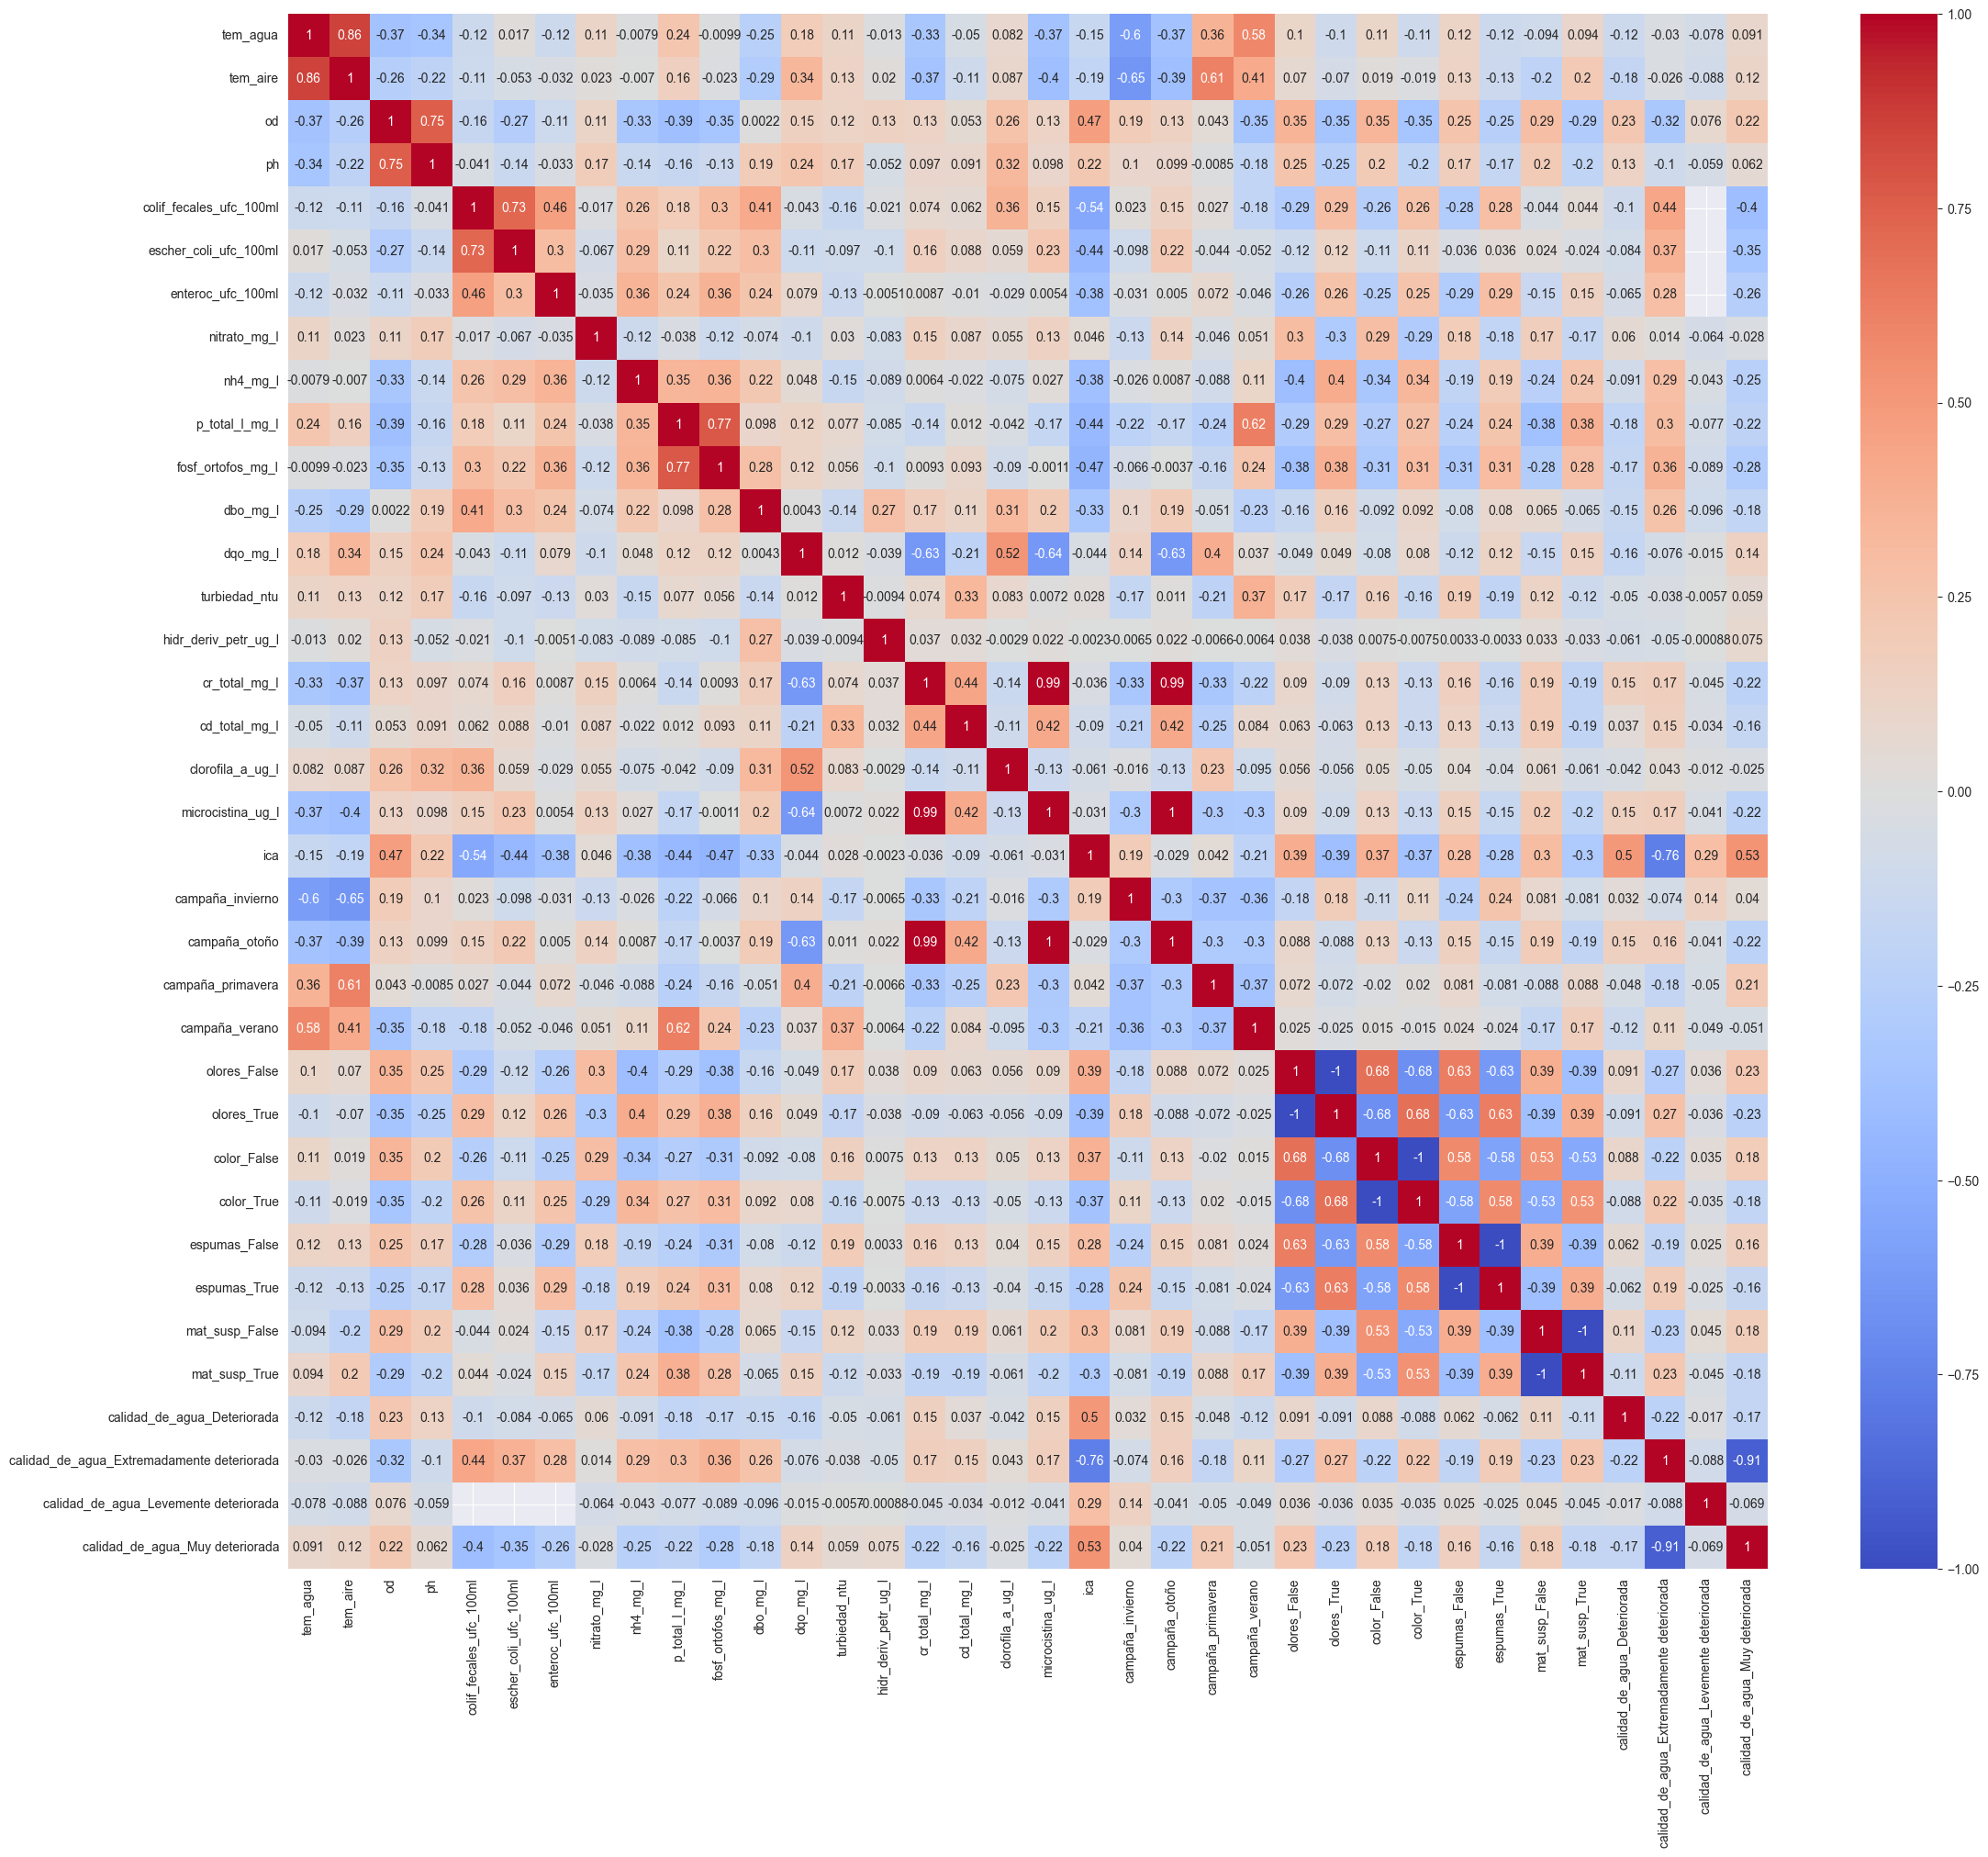

In [15]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df_correlation.corr()
plt.figure(figsize = (26,22))
sns.heatmap(correlation_matrix , vmin = -1.0 , vmax = 1.0, center = 0.0, annot = True, cmap = 'coolwarm')
# plt.show()


<Axes: >

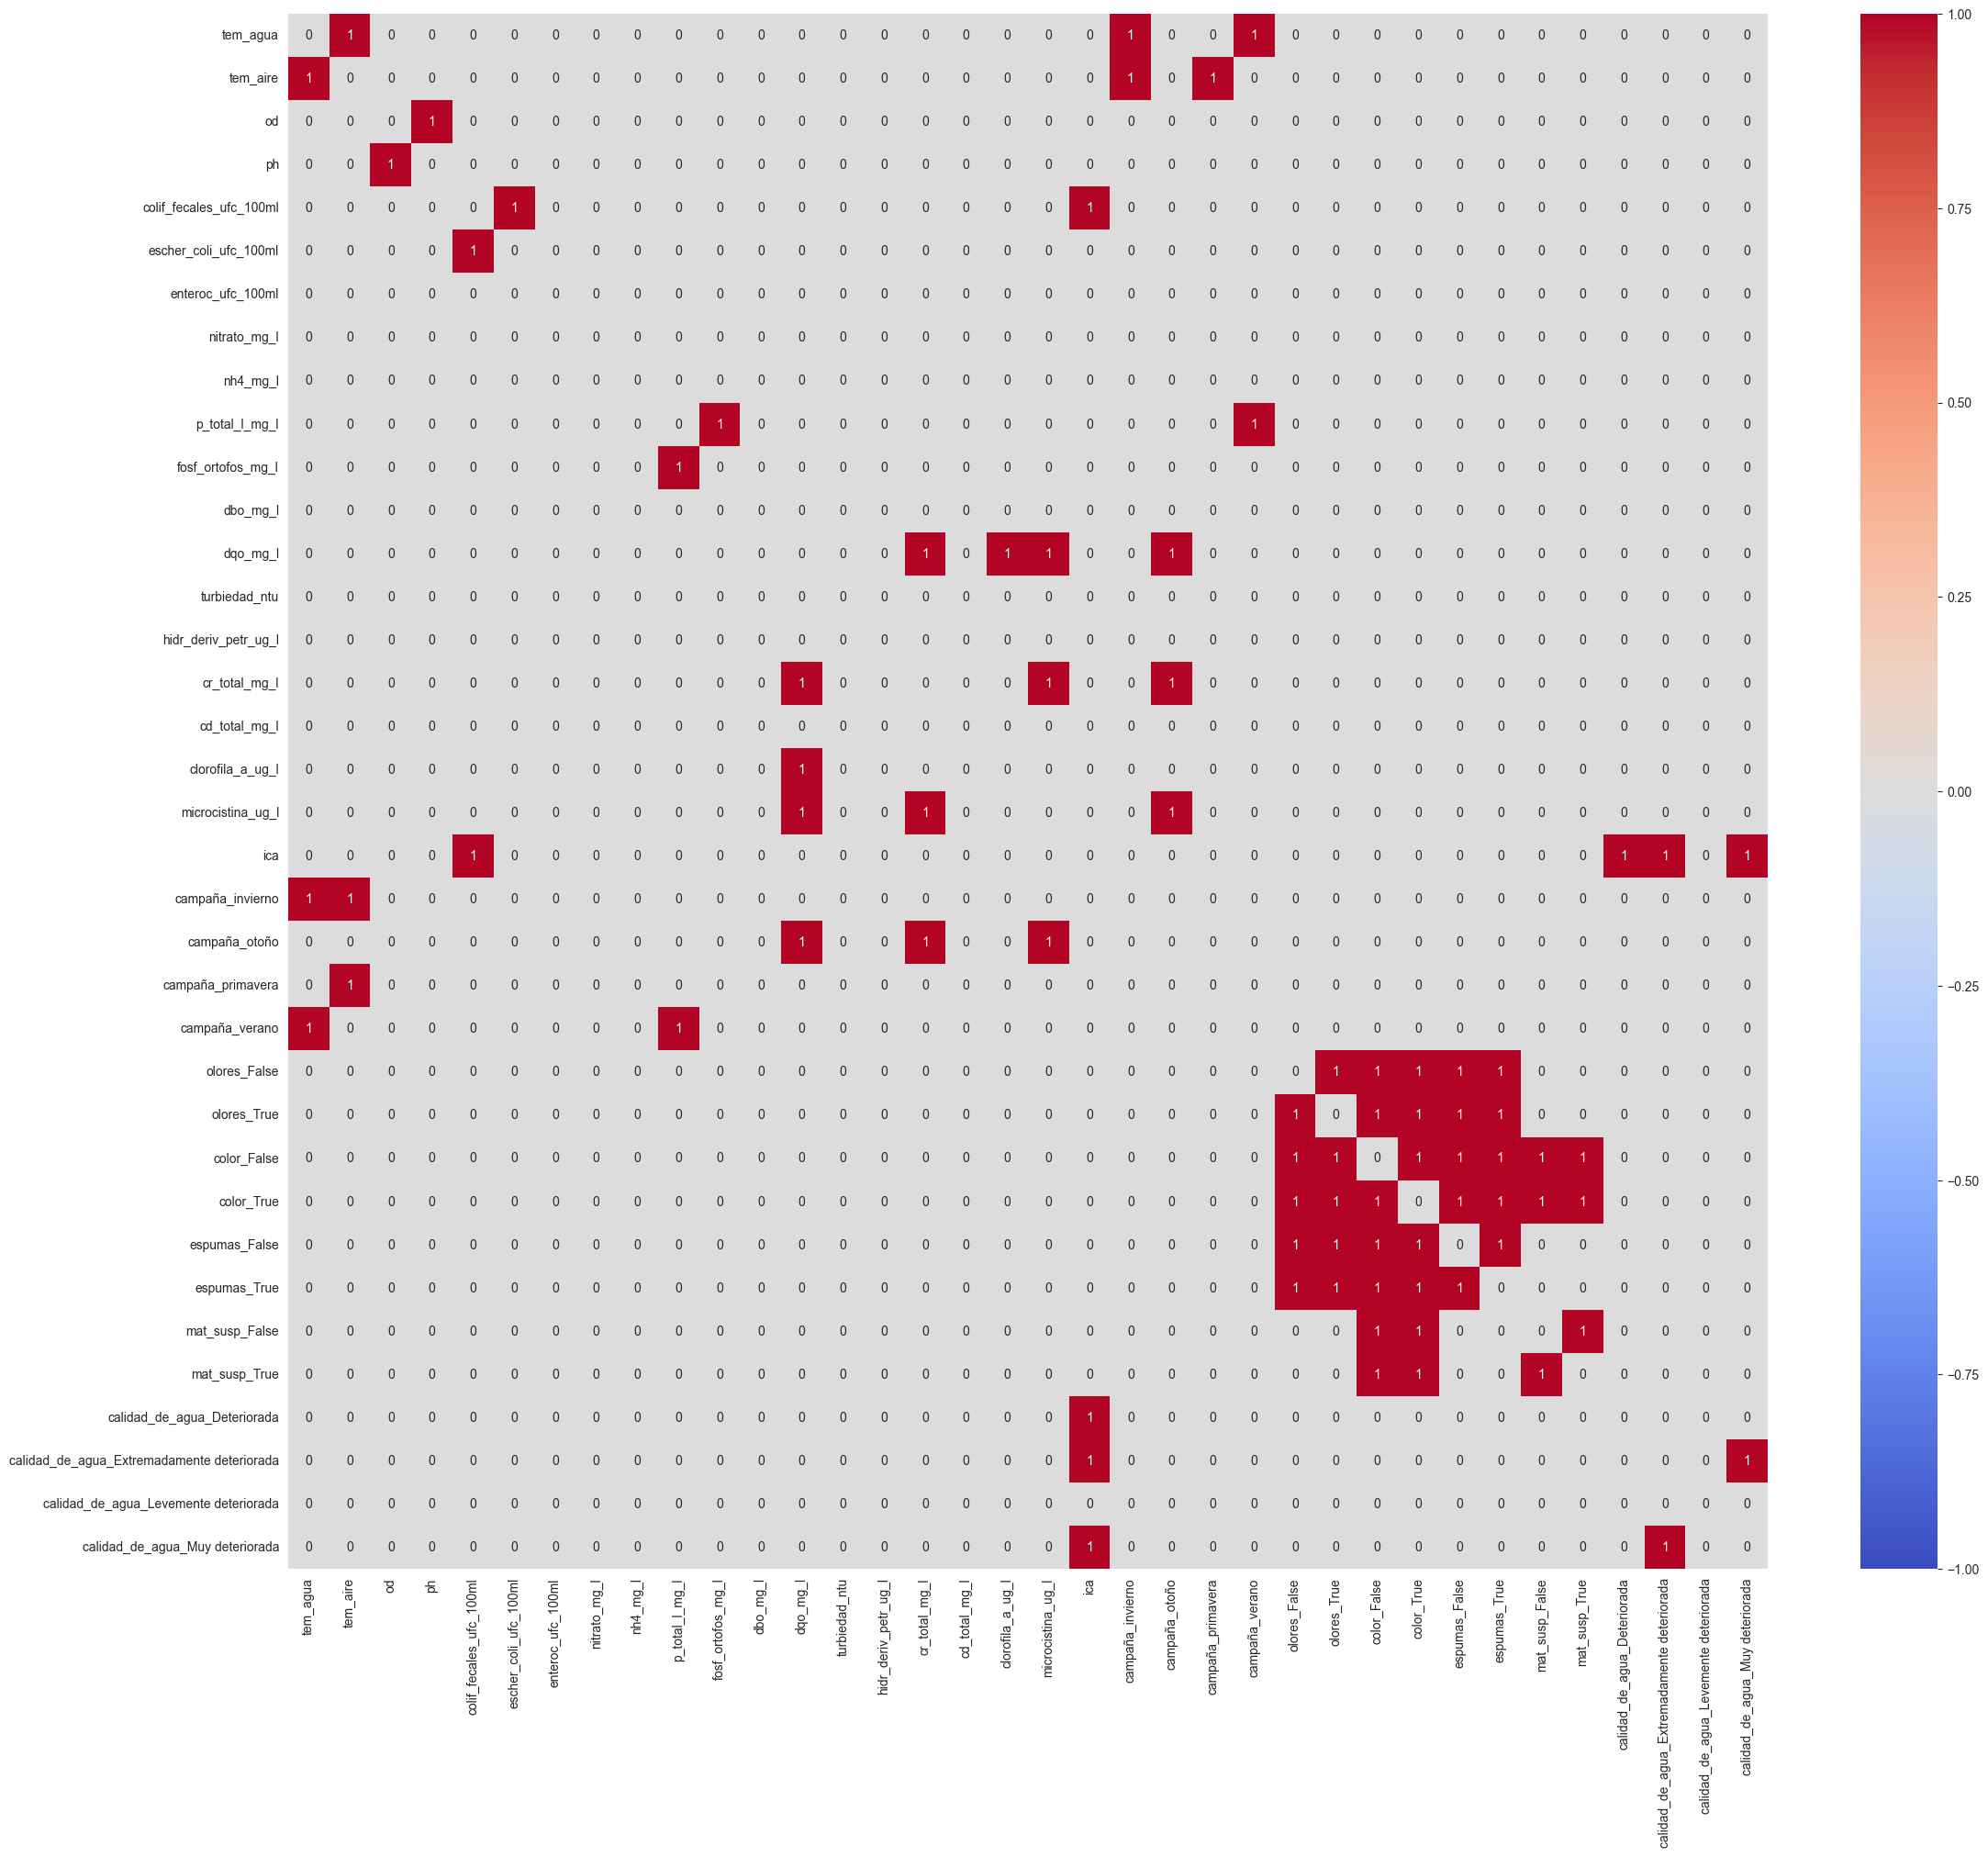

In [16]:
correlation_matrix_umbralized = correlation_matrix.abs() > 0.5

np.fill_diagonal(correlation_matrix_umbralized.values, 0 )

plt.figure(figsize = (26,22))
sns.heatmap(correlation_matrix_umbralized , vmin = -1.0 , vmax = 1.0, center = 0.0, annot = True, cmap = 'coolwarm')
# plt.show()


# Mapeo geografico de las locaciones

In [17]:
df_sitios = df_cleaned['sitios'].unique()

In [18]:
df_sitios = pd.DataFrame({'sitios': df_sitios})
df_sitios.to_csv('df_sitios.csv', index=False)

In [19]:
if not path.exists("coordenadas_sitios.csv"):
    download('https://raw.githubusercontent.com/joacoloza/tpFundamentos/refs/heads/main/coordenadas_sitios.csv')
else:
    print('descargado already')
df_coordenadas = pd.read_csv('coordenadas_sitios.csv')
df_coordenadas = df_coordenadas.drop(columns=['coords'])
df_completo = pd.merge(df_cleaned, df_coordenadas, on='sitios', how='left')
df_completo

descargado already


,sitios,fecha,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,...,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua,latitud,longitud
0,Canal Villanueva y Río Luján,24/2/2021,verano,25.6,27.0,3.91,6.96,False,False,False,...,60.0,100.0,5.000,0.001,0.00000,0.15,42.0,Extremadamente deteriorada,-34.357343,-58.679558
1,Canal Villanueva y Río Luján,19/5/2021,otoño,15.6,13.0,8.28,6.79,False,False,False,...,30.0,110.0,100.000,0.005,0.00100,10.00,48.0,Muy deteriorada,-34.357343,-58.679558
2,Canal Villanueva y Río Luján,25/8/2021,invierno,14.8,13.0,9.90,7.09,False,False,False,...,27.0,100.0,0.005,0.001,0.01000,0.20,64.0,Muy deteriorada,-34.357343,-58.679558
3,Canal Villanueva y Río Luján,27/10/2021,primavera,24.4,29.0,7.28,6.91,False,False,False,...,45.0,100.0,0.005,0.001,0.00356,0.20,55.0,Muy deteriorada,-34.357343,-58.679558
4,Río Lujan y Arroyo Caraguatá,24/2/2021,verano,25.7,26.0,4.31,7.40,False,True,False,...,31.0,100.0,5.000,0.001,0.00500,0.15,49.0,Muy deteriorada,-34.351925,-58.685304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Balneario Municipal,27/10/2021,primavera,11.0,19.0,7.58,8.21,False,False,False,...,70.0,100.0,0.005,0.001,0.04153,0.20,62.0,Muy deteriorada,-34.917904,-57.741107
147,Playa La Balandra,24/2/2021,verano,20.0,26.0,4.89,7.75,False,False,False,...,5.3,100.0,5.000,0.001,0.00600,0.15,46.0,Muy deteriorada,-34.928529,-57.717712
148,Playa La Balandra,25/8/2021,invierno,7.0,9.0,9.99,9.22,False,True,False,...,75.0,100.0,0.005,0.001,0.01000,0.20,46.0,Muy deteriorada,-34.928529,-57.717712
149,Playa La Balandra,25/8/2021,invierno,7.0,8.0,10.70,9.19,False,False,False,...,75.0,100.0,0.005,0.001,0.01000,0.20,43.0,Extremadamente deteriorada,-34.928529,-57.717712


<Axes: xlabel='longitud', ylabel='latitud'>

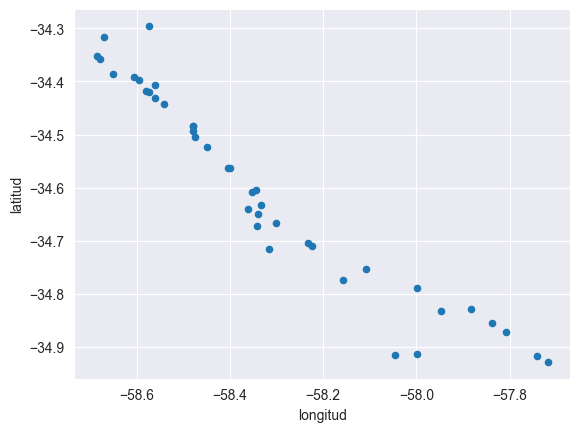

In [20]:
df_coordenadas.plot(kind = "scatter",x= "longitud",y = "latitud")

In [21]:
import folium

# Leer el dataset con coordenadas (suponiendo que el archivo se llama 'coordenadas.csv')
# y tiene columnas llamadas 'latitud' y 'longitud'


# Crear un mapa centrado en la primera coordenada del dataset
m = folium.Map(location=[df_coordenadas['latitud'].mean(), df_coordenadas['longitud'].mean()], zoom_start=10,  # Definir el ancho del mapa
    zoom_control=False,  # Desactivar el control de zoom
    scrollWheelZoom=False,  # Desactivar zoom con la rueda del mouse
    dragging=False)

# Añadir las coordenadas al mapa como marcadores
for idx, row in df_coordenadas.iterrows():
    folium.Marker([row['latitud'], row['longitud']]).add_to(m)

# Guardar el mapa en un archivo HTML
m.save('mapa_coordenadas.html')

# Mostrar el mapa en Jupyter Notebook (opcional, si estás usando Jupyter)
m

Desarrollamos la hipotesis sobre el cambio en la calidad del agua en funcion de la temporada


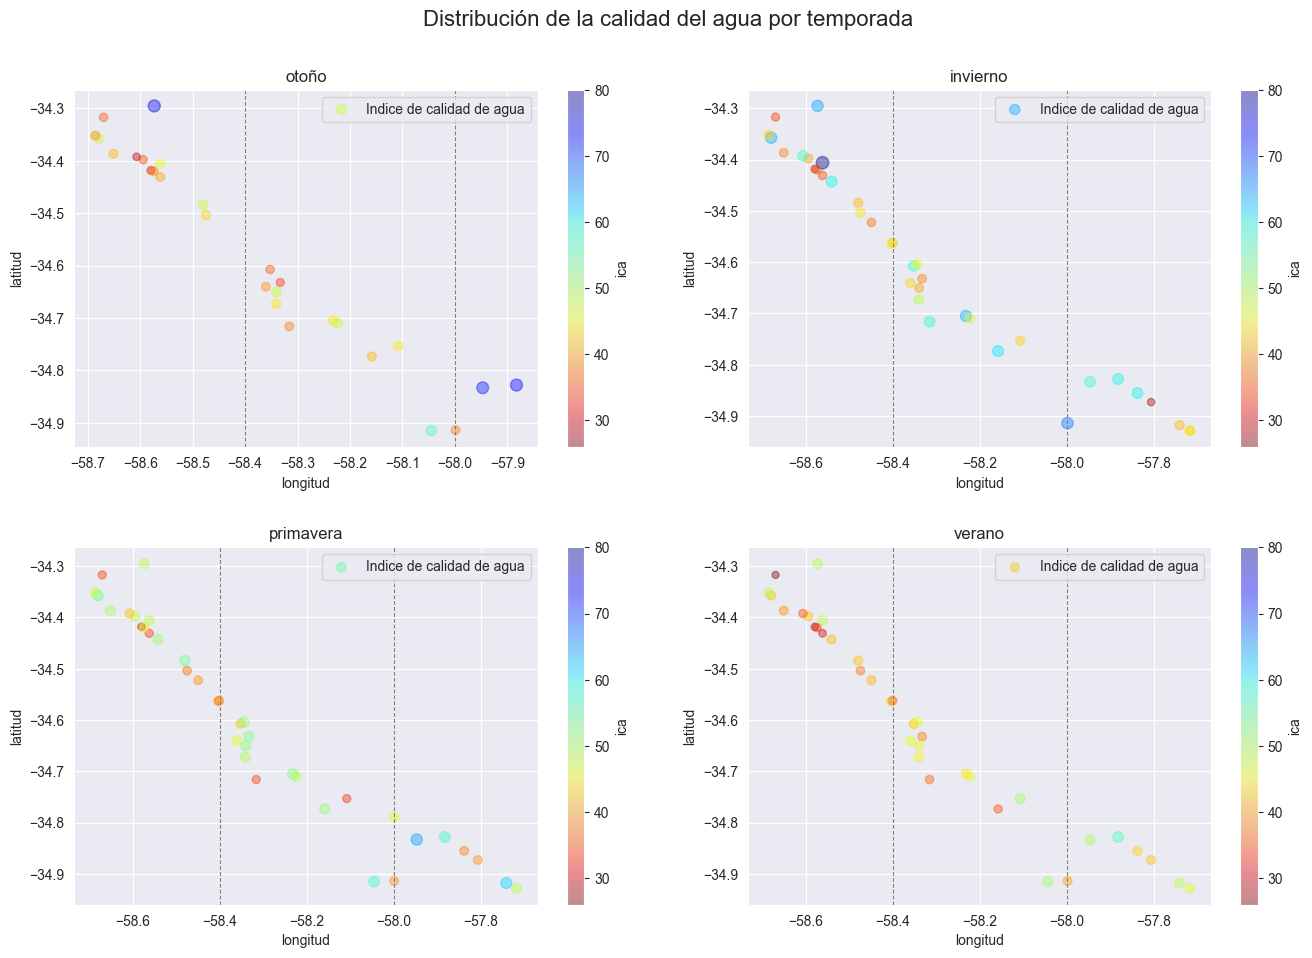

In [22]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

df_invierno = df_completo[df_completo['campaña']=='invierno']
df_otoño = df_completo[df_completo['campaña']=='otoño']
df_primavera = df_completo[df_completo['campaña']=='primavera']
df_verano = df_completo[df_completo['campaña']=='verano']

# Lista de longitudes deseadas para las líneas verticales
longitudes_deseadas = [-58.4, -58]

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

minima_calidad = df_completo["ica"].min()
maxima_calidad = df_completo["ica"].max()

# Gráfico para otoño
df_otoño.plot(kind="scatter", x="longitud", y="latitud", alpha=0.4,
              s=df_otoño["ica"], label="Indice de calidad de agua",
              c="ica", cmap=cm.jet.reversed(),
              vmin = minima_calidad, vmax = maxima_calidad,
              title="otoño", ax=axs[0, 0])

# Gráfico para invierno
df_invierno.plot(kind="scatter", x="longitud", y="latitud", alpha=0.4,
                 s=df_invierno["ica"], label="Indice de calidad de agua",
                 c="ica", cmap=cm.jet.reversed(),
                 vmin = minima_calidad, vmax = maxima_calidad,
                 title="invierno", ax=axs[0, 1])

# Gráfico para primavera
df_primavera.plot(kind="scatter", x="longitud", y="latitud", alpha=0.4,
                  s=df_primavera["ica"], label="Indice de calidad de agua",
                  c="ica", cmap=cm.jet.reversed(),
                  vmin = minima_calidad, vmax = maxima_calidad,
                  title="primavera", ax=axs[1, 0])

# Gráfico para verano
df_verano.plot(kind="scatter", x="longitud", y="latitud", alpha=0.4,
               s=df_verano["ica"], label="Indice de calidad de agua",
               c="ica", cmap=cm.jet.reversed(),
               vmin = minima_calidad, vmax = maxima_calidad,
               title="verano", ax=axs[1, 1])

# Añadir líneas verticales en cada subgráfico
for ax in axs.flat:
    for lon in longitudes_deseadas:
        ax.axvline(x=lon, color='gray', linestyle='--', linewidth=0.8)  # Línea en longitud deseada

# Ajustar el espaciado entre los gráficos con padding
plt.tight_layout(pad=3.0)

# Agregar un título a toda la figura
fig.suptitle('Distribución de la calidad del agua por temporada', fontsize=16)

# Ajustar el espacio para el título
plt.subplots_adjust(top=0.9)

plt.show()


Podemos ver a partir de los graficos que en general la calidad del agua cambia segun la temporada, teniendo los mejores indices en el invierno seguido de la primavera y alcanza sus niveles mas bajos en el verano.

A partir de estos graficos nos vamos a fijar en la distribucion de las bacterias, para ver si se relacionan con la calidad del agua

#Hipotesis a mayor cantidad de presencia que indica materia fecal peor calidad del agua

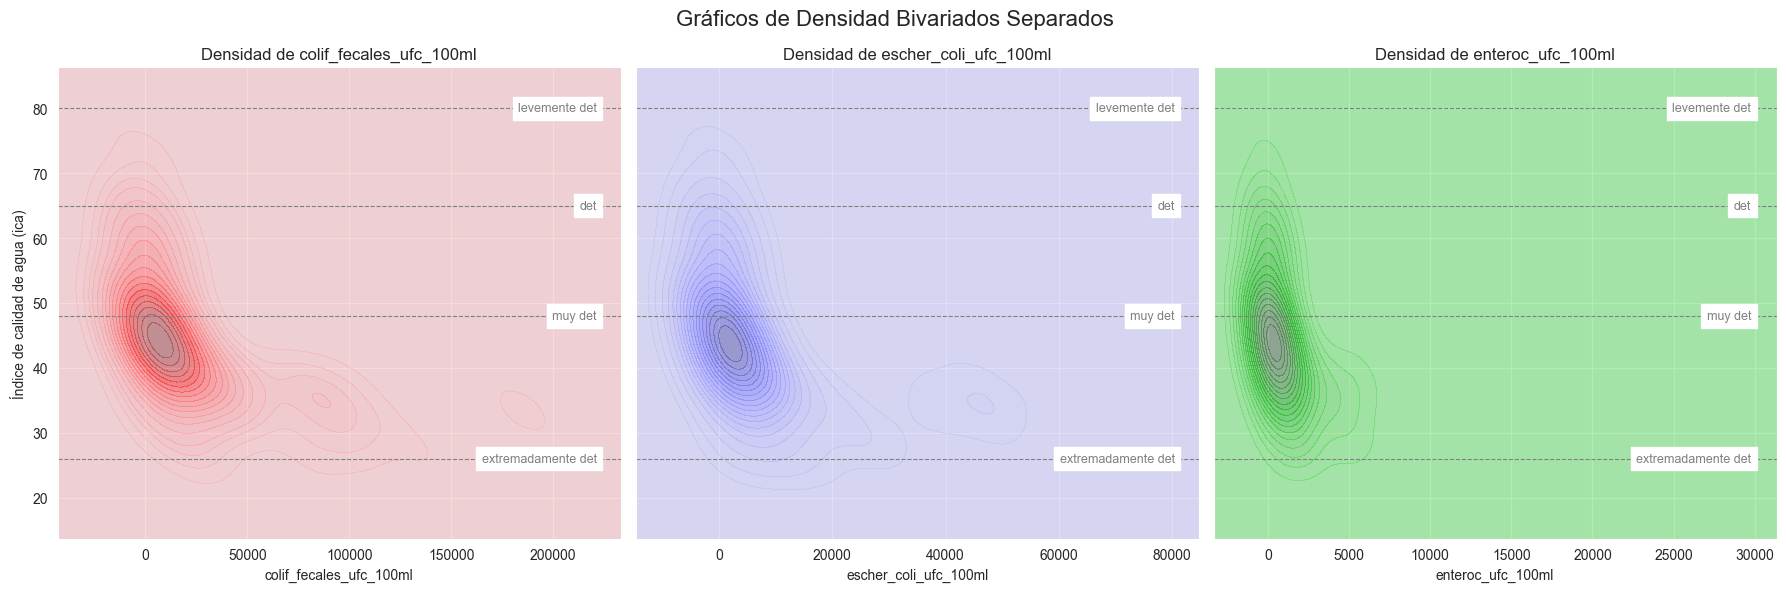

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos las variables de análisis:
variables_x = ['colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'enteroc_ufc_100ml']  #Definimmos las variables bacterianas para análisis de calidad del agua
colores = ['red', 'blue', 'green']  # Asignamos un color a cada variable
indices_deseados = [26,48,65,80] #Límites de clasificación de calidad de agua en el eje y (índice ica)
nombres = ['extremadamente det','muy det','det','levemente det'] #Escribimos los nombres para una mejor comprension del grafico

# Creamos una figura con 3 gráficos en línea para cada variable de interés
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 1 fila, 3 columnas con el eje y compartido

# Recorremos las variables y las graficamos con sus respectivos colores y transparencias
for i, variable in enumerate(variables_x):
    sns.kdeplot(
        x=df_completo[variable],
        y=df_completo['ica'],
        color=colores[i],
        fill=True,
        thresh=0,
        levels=20,
        alpha=0.5,  # Transparencia del gráfico de densidad
        ax=axs[i]  # Plotea en el eje correspondiente
    )
    axs[i].set_title(f'Densidad de {variable}')
    axs[i].set_xlabel(variable)
    for y_val,nombre in zip(indices_deseados,nombres):
            axs[i].axhline(y=y_val, color='gray', linestyle='--', linewidth=0.8)

            axs[i].text(x=axs[i].get_xlim()[1] * 0.95, y=y_val, s=nombre,
                            color='gray', va='center', ha='right', fontsize=9,
                            backgroundcolor='white')

# Configuramos el eje y compartido y el título de toda la figura
axs[0].set_ylabel('Índice de calidad de agua (ica)')
fig.suptitle('Gráficos de Densidad Bivariados Separados', fontsize=16)

# Ajustamos el diseño para una mejor visualizacion del grafico y lo mostramos
plt.tight_layout()
plt.show()


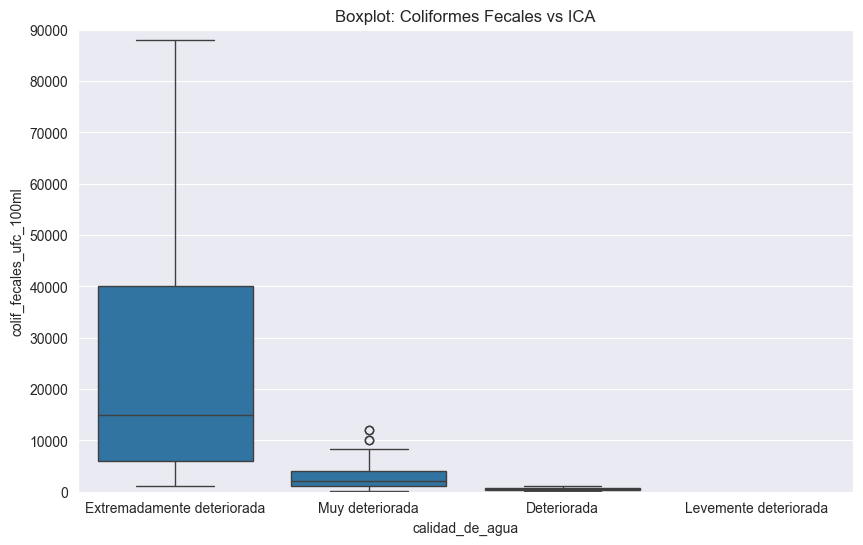

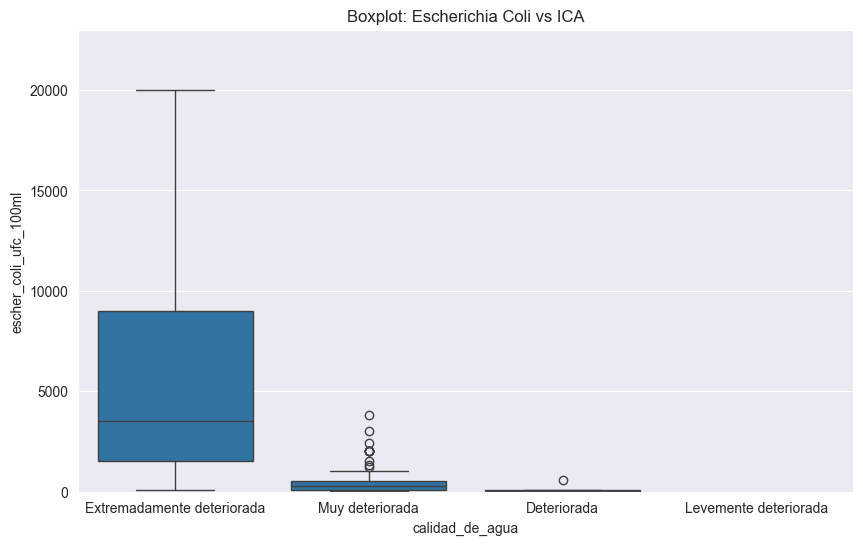

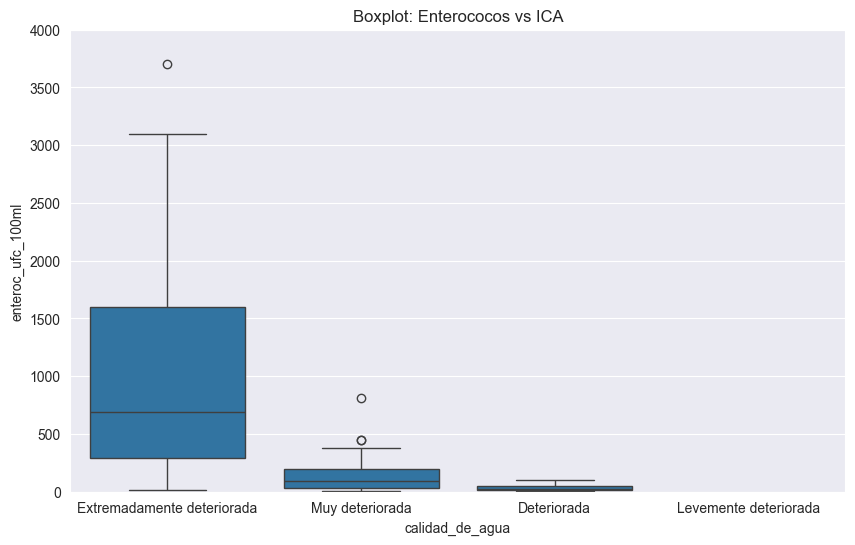

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes un DataFrame 'df' con las bacterias y el ICA
# Crear el boxplot para cada tipo de bacteria vs ICA
figsize = (10, 6)

# Boxplot para 'colif_fecales_ufc_100ml'
plt.figure(figsize=figsize)
sns.boxplot(x='calidad_de_agua', y='colif_fecales_ufc_100ml', data=df_completo)
plt.title('Boxplot: Coliformes Fecales vs ICA')
plt.ylim(0, 90000)
plt.show()

# Boxplot para 'escher_coli_ufc_100ml'
plt.figure(figsize=figsize)
sns.boxplot(x='calidad_de_agua', y='escher_coli_ufc_100ml', data=df_completo)
plt.ylim(0, 23000)
plt.title('Boxplot: Escherichia Coli vs ICA')
plt.show()

# Boxplot para 'enteroc_ufc_100ml'
plt.figure(figsize=figsize)
sns.boxplot(x='calidad_de_agua', y='enteroc_ufc_100ml', data=df_completo)
plt.title('Boxplot: Enterococos vs ICA')
plt.ylim(0, 4000)
plt.show()


A partir de la grafica presentada por los boxplots se puede llegar a pensar que a medida que hay menos bacterias fecales, la calidad del agua tiende a mejorar

Vamos a realizar un analisis de normalidad con shapiro

In [25]:
from scipy.stats import shapiro

variables = ['colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'enteroc_ufc_100ml', 'ica']

for variable in variables:
    stat, p_value = shapiro(df_completo[variable].dropna())
    print(f"Variable: {variable}")
    print(f"Estadístico Shapiro-Wilk: {stat}, p-valor: {p_value}")

    if p_value > 0.05:
        print(f"La variable {variable} sigue una distribución normal.\n")
    else:
        print(f"La variable {variable} no sigue una distribución normal.\n")

Variable: colif_fecales_ufc_100ml
Estadístico Shapiro-Wilk: 0.5798704960461061, p-valor: 7.792646596231816e-19
La variable colif_fecales_ufc_100ml no sigue una distribución normal.

Variable: escher_coli_ufc_100ml
Estadístico Shapiro-Wilk: 0.48067070179418603, p-valor: 9.700071422212234e-21
La variable escher_coli_ufc_100ml no sigue una distribución normal.

Variable: enteroc_ufc_100ml
Estadístico Shapiro-Wilk: 0.3211291814862919, p-valor: 2.739341093473691e-23
La variable enteroc_ufc_100ml no sigue una distribución normal.

Variable: ica
Estadístico Shapiro-Wilk: 0.9579029084812799, p-valor: 0.00014946250869694245
La variable ica no sigue una distribución normal.



Nos damos cuenta con esto que ninguna de las variables a analizar sigue una distribucion normal

In [26]:
from scipy.stats import levene

# Lista de las variables que quieres comparar
variables = ['colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'enteroc_ufc_100ml', 'ica']

# Seleccionando las variables del dataframe
df_bacterias_ica =df_completo[['colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'enteroc_ufc_100ml','ica']].dropna()


# Aplicando el test de Levene
stat, p_value = levene(df_bacterias_ica['colif_fecales_ufc_100ml'], df_bacterias_ica['escher_coli_ufc_100ml'], df_bacterias_ica['enteroc_ufc_100ml'], df_bacterias_ica['ica'])

# Mostrando los resultados
print(f"Estadístico de Levene: {stat}")
print(f"p-valor de Levene: {p_value}")

# Interpretación
if p_value > 0.05:
    print("Las varianzas son homogéneas (homocedasticidad).")
else:
    print("Las varianzas no son homogéneas (heterocedasticidad).")


Estadístico de Levene: 29.812225440655
p-valor de Levene: 5.9402007676118076e-18
Las varianzas no son homogéneas (heterocedasticidad).


Aqui se puede observar con el test de Levene que las varianzas no son homogeneas.Por lo tanto al no cumplir los supuestos de normalidad y homecedasticidad nos inclinamos por realizar el test de Kruskal

In [27]:
from scipy.stats import kruskal

# Comparando las variables
stat, p_value = kruskal(df_bacterias_ica['colif_fecales_ufc_100ml'],
                         df_bacterias_ica['escher_coli_ufc_100ml'],
                         df_bacterias_ica['enteroc_ufc_100ml'],
                         df_bacterias_ica['ica'])
print(f"Estadístico de Kruskal-Wallis: {stat}")
print(f"p-valor: {p_value}")

if p_value < 0.05:
    print("Se rechaza H₀: Al menos una de las distribuciones es diferente.")
else:
    print("No se rechaza H₀: Las distribuciones son similares.")


Estadístico de Kruskal-Wallis: 352.5195593128387
p-valor: 4.2472591191529874e-76
Se rechaza H₀: Al menos una de las distribuciones es diferente.


Podemos ver que, a mayor deterioramiento de la calidad del agua mayor presencia de bacterias, entonces lo que vamos a representar es como se distribuyen estas tres variables, durante el año junto con el indice ica.

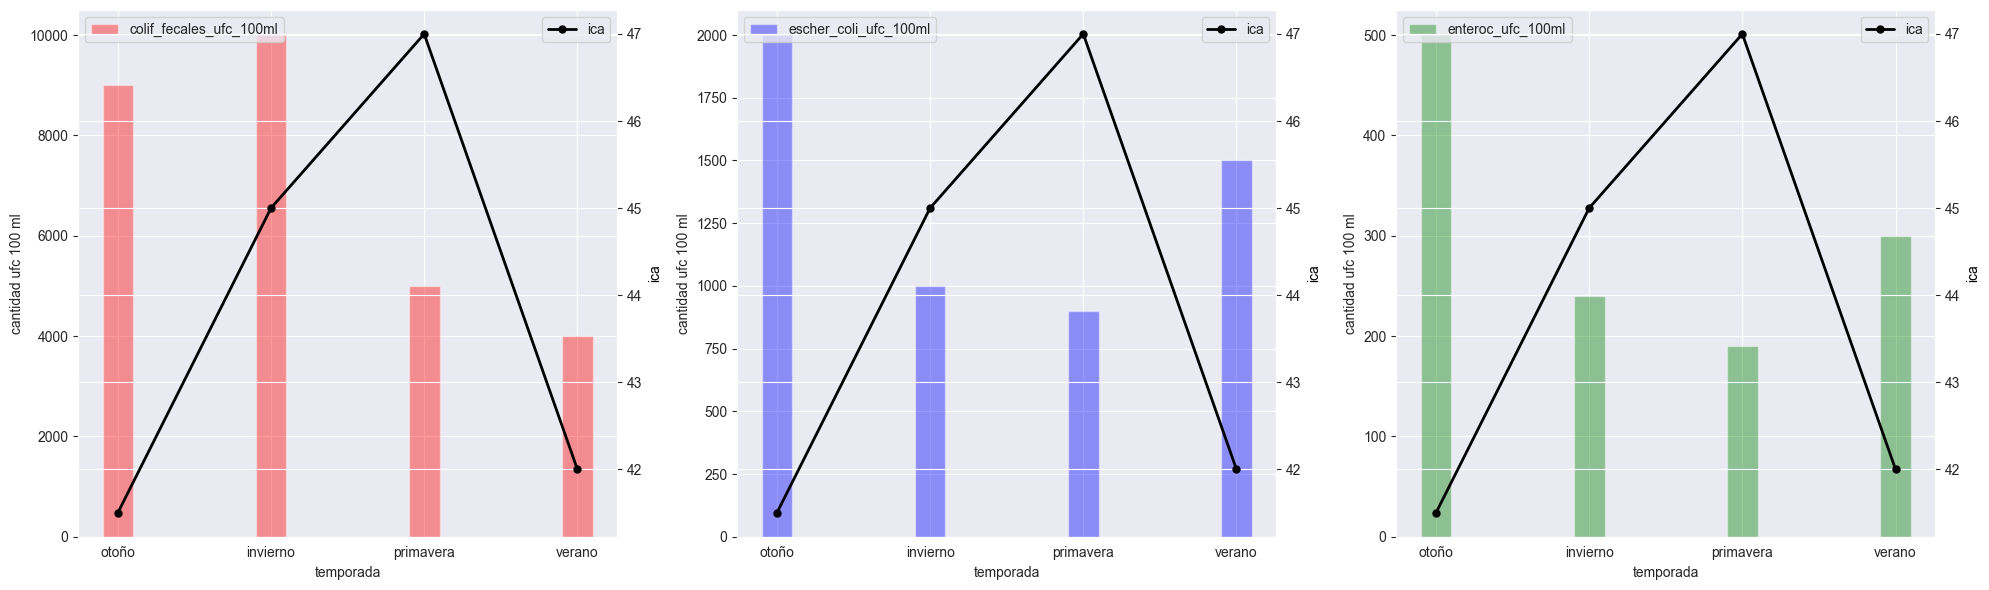

In [28]:
dic_data = {variable_x: [] for variable_x in variables_x}
tendencia_ica = []
label_temporada = ['otoño','invierno','primavera','verano']

dataframes_temporadas = [df_otoño,df_invierno,df_primavera,df_verano]
for temporada in dataframes_temporadas :
  for variable in variables_x:
    mediana = temporada[variable].median()
    dic_data[variable].append(mediana) # Almacena la mediana de la variable de bacterias fecales
  mediana_ica = temporada['ica'].median()
  tendencia_ica.append(mediana_ica)

ancho_barras = 0.2
x = np.arange(len(dataframes_temporadas)) # Para los indices



fig, axs = plt.subplots(1, 3, figsize=(20, 6))
for i, ax1 in enumerate(axs):
  variable = variables_x[i]
  ax1.bar(x,dic_data[variable], width = ancho_barras, label = variable, color=colores[i], alpha = 0.4)

  ax1.set_xlabel('temporada')
  ax1.set_ylabel('cantidad ufc 100 ml')
  ax1.set_xticks(x)
  ax1.set_xticklabels(label_temporada)

  ax2 = ax1.twinx()
  ax2.plot(x,tendencia_ica, color = 'black', marker = 'o', markersize = 5 , linestyle = '-',linewidth = 2, label = 'ica')
  ax2.set_ylabel('ica' ,color = 'black')
  ax1.legend(loc='upper left')
  ax2.legend(loc='upper right')


plt.tight_layout()
plt.show()


segun los graficos podemos ver que los indices mas bajos de calidad se coinciden con los indices mas alto de cantidad de bacterias por temporada, si bien bajo este analisis la temporada con peor calidad deberia ser el otoño y no el verano, que en nuestro estudio anterior sea el verano puede deberse a otras variables.
Entonces vamos a trabajar sobre las otras variables que son signo de contaminacion

A continuacion mostramos los diferentes clusters de las estaciones y el ICA

In [29]:
# Eliminamos nulos para hacer el analisis TSNE
df_bacterias_ica =df_completo[['colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'enteroc_ufc_100ml','ica']].dropna()
df_bacterias_ica[['colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'enteroc_ufc_100ml','ica']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 0 to 150
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   colif_fecales_ufc_100ml  148 non-null    float64
 1   escher_coli_ufc_100ml    148 non-null    float64
 2   enteroc_ufc_100ml        148 non-null    float64
 3   ica                      148 non-null    float64
dtypes: float64(4)
memory usage: 5.8 KB


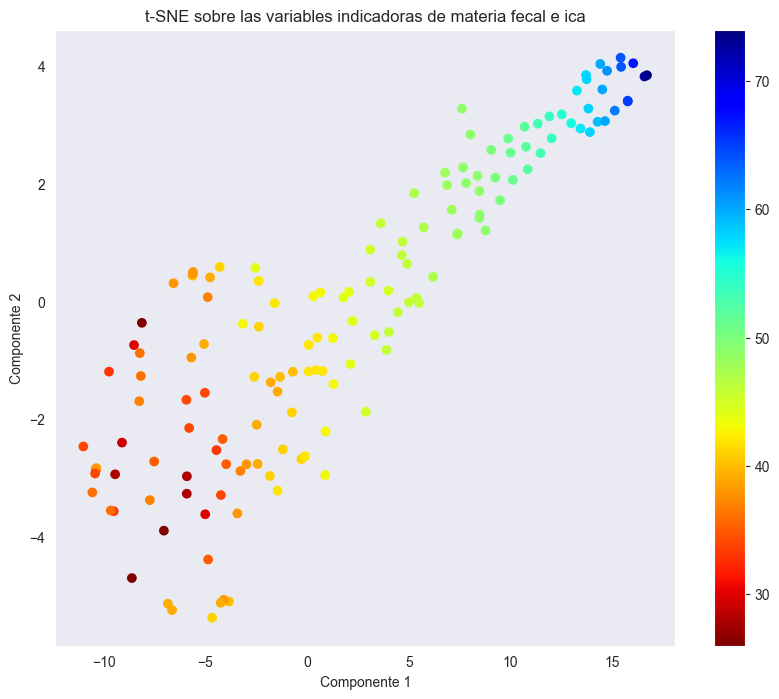

In [30]:
x = df_bacterias_ica
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Inicializar t-SNE
tsne = TSNE(n_components=2, random_state = 10)

# Ajustar y transformar los datos
X_embedded = tsne.fit_transform(x_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], cmap='jet_r', c = x['ica'])
plt.title('t-SNE sobre las variables indicadoras de materia fecal e ica')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar()
plt.grid()
plt.show()

El gráfico de t-SNE muestra una estructura clara en los datos. Esto sugiere que hay una relación continua entre las variables de bacterias fecales y el ICA.

Los datos estan ordenados y siguen un patron

Lo siguiente que vamos a hacer es un anälisis de correlacion Spearman entre las variables de contaminacion fecal y el ICA

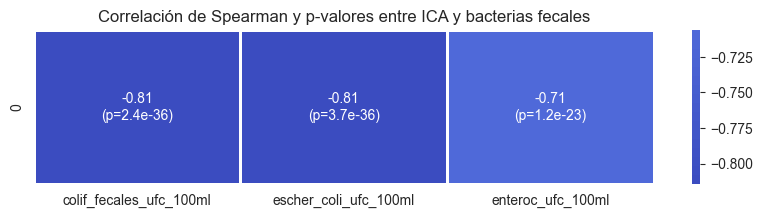

In [31]:
from scipy.stats import mannwhitneyu

# variables_fecales = ['colif_fecales_ufc_100ml','escher_coli_ufc_100ml', 'enteroc_ufc_100ml', 'ica']
# Definir las columnas de bacterias y el ICA
bacteria_columns = ['colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'enteroc_ufc_100ml']
ica_column = 'ica'
data = df_bacterias_ica.copy()

# Convertir a numérico y filtrar NaN
data[bacteria_columns + [ica_column]] = data[bacteria_columns + [ica_column]].apply(pd.to_numeric, errors='coerce')
data_no_nan = data.dropna(subset=bacteria_columns + [ica_column])

from scipy.stats import spearmanr

corr_values = []
corr_pvalues = []
# Calcular correlación de Spearman
for bacteria in bacteria_columns:
    corr, p_value = spearmanr(data_no_nan[bacteria], data_no_nan['ica'])
    corr_values.append(corr)
    corr_pvalues.append(p_value)
    # print(f"Correlación de Spearman entre {bacteria} e ICA: {corr}, p-valor: {p_value}")

# Crear el DataFrame de correlación (una fila y tres columnas)
corr_matrix = pd.DataFrame(corr_values, index=bacteria_columns).T
p_matrix = pd.DataFrame(corr_pvalues, index=bacteria_columns).T

# Crear un DataFrame de anotaciones combinando la correlación y el p-valor en cada celda
annotations = corr_matrix.copy()
annotations = annotations.astype(str)

for row in corr_matrix.index:
    for col in corr_matrix.columns:
        corr = corr_matrix.loc[row, col]
        p = p_matrix.loc[row, col]
        annotations.loc[row, col] = f'{corr:.2f}\n(p={p:.1e})'  # Formato para mostrar p-valor en notación científica

# Graficar el mapa de calor con anotaciones de correlación y p-valores
plt.figure(figsize=(10, 2))
sns.heatmap(corr_matrix, annot=annotations, fmt="", cmap='coolwarm', center=0, cbar=True, linewidths=2)
plt.title("Correlación de Spearman y p-valores entre ICA y bacterias fecales")
plt.show()


El analisis de Correlacion de Spearman refuerza aun mas nuestra hipotesis mostrando una alta correlacion entre estas variables con el ICA

SyntaxError: invalid syntax (2836437507.py, line 1)

#HIPOTESIS: La presencia o ausencia de los factores olores, color, espumas y materia suspendida  tiene efecto sobre los valores de ICA

##Analisis visual mediante boxplot

Variables booleanas: Index(['olores', 'color', 'espumas', 'mat_susp'], dtype='object')


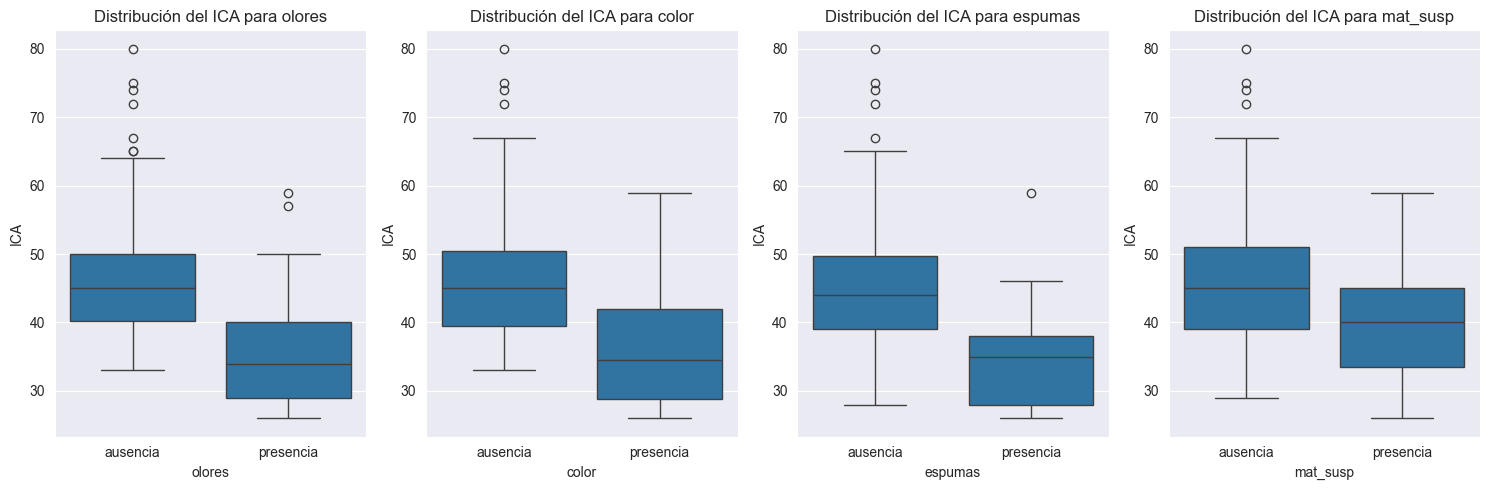

In [33]:
# Identificar columnas booleanas
bool_columns = df_completo.select_dtypes(include=['bool', 'int64']).columns
print("Variables booleanas:", bool_columns)

data = df_completo[['ica']+ list (bool_columns)].copy()

order = ["ausencia", "presencia"]

# Asegurarse de que todas las variables booleanas están en formato 0 y 1
for column in bool_columns:
    data[column] = data[column].astype(int)

from scipy.stats import mannwhitneyu

# Definir la variable ICA
ica_column = 'ica'

import seaborn as sns
import matplotlib.pyplot as plt
for column in bool_columns:
    data[column] = data[column].replace({0: 'ausencia', 1: 'presencia'})

# Configuración del tamaño de los gráficos
plt.figure(figsize=(15, 5))

# Crear un boxplot para cada variable booleana
for i, column in enumerate(bool_columns, 1):
    plt.subplot(1, len(bool_columns), i)
    sns.boxplot(x=column, y=ica_column, data=data, order=order)
    plt.title(f"Distribución del ICA para {column}")
    plt.xlabel(column)
    plt.ylabel('ICA')

plt.tight_layout()
plt.show()

Con el test de shapiro nos damos cuenta que la variable continua ica no sigue una distribucion normal.
Las variables categóricas(o binarias) como lo son olores,espumas,color y mat_susp no requieren que verificar su normalidad, ya que no siguen una distribución continua y no tienen sentido para análisis de normalidad.

In [34]:
from scipy.stats import shapiro

stat, p_value = shapiro(df_completo['ica'])
print(f'Estadístico Shapiro-Wilk: {stat}, p-valor: {p_value}')

if p_value > 0.05:
    print("La variable ica sigue una distribución normal.")
else:
    print("La variable ica no sigue una distribución normal.")


Estadístico Shapiro-Wilk: 0.9579029084812799, p-valor: 0.00014946250869694245
La variable ica no sigue una distribución normal.


Al realizar el test de levene para analizar la calidad del agua, nos encontramos que los datos son homocedasticos, lo que significa que las varianzas son homogeneas. Por lo tanto estamos en condiciones de realizar un test de Mann-Whitney U

In [35]:
from scipy.stats import levene

# Suponiendo que el DataFrame se llama `df_completo` y que tienes columnas 'ica' y 'calidad_agua'
grupo1 = df_completo[df_completo['calidad_de_agua'] == 'Extremadamente deteriorada']['ica']
grupo2 = df_completo[df_completo['calidad_de_agua'] == 'Levemente deteriorada']['ica']
grupo3 = df_completo[df_completo['calidad_de_agua'] == 'Muy deteriorada']['ica']
grupo4 = df_completo[df_completo['calidad_de_agua'] == 'Deteriorada']['ica']

# Realizar el test de Levene para comparar la homogeneidad de las varianzas entre los 4 grupos
stat, p_value = levene(grupo1, grupo2, grupo3, grupo4)
print(f'Estadístico de Levene: {stat}, p-valor: {p_value}')

# Interpretar el resultado
if p_value > 0.05:
    print("Las varianzas son homogéneas entre las categorías de calidad del agua (homocedasticidad).")
else:
    print("Las varianzas no son homogéneas entre las categorías de calidad del agua (heterocedasticidad).")


Estadístico de Levene: 0.6246451219221306, p-valor: 0.6001644788501691
Las varianzas son homogéneas entre las categorías de calidad del agua (homocedasticidad).


procederemos a realizar un test de hipotesis para asi aceptar o rechazar esta teoria.
Como los datos no siguen una distribucion normal usaremos un test de Mann-Whitney U

In [36]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Supongamos que tienes un DataFrame llamado `df` con las columnas 'ICA', 'olores', 'color', 'espumas', 'mat_susp'

# Crear un diccionario para almacenar los resultados
resultados = {}

# Definir las columnas a analizar
columnas = ['olores', 'color', 'espumas', 'mat_susp']

for columna in columnas:
    grupo_0 = df_completo[df_completo[columna] == 0]['ica']
    grupo_1 = df_completo[df_completo[columna] == 1]['ica']

    # Realizar el test de Mann-Whitney U
    stat, p_value = mannwhitneyu(grupo_0, grupo_1, alternative='two-sided')

    # Guardar los resultados en el diccionario
    resultados[columna] = {'U_statistic': stat, 'p_value': p_value}

# Mostrar los resultados
resultados


{'olores': {'U_statistic': np.float64(2588.0),
  'p_value': np.float64(3.9076079316114823e-07)},
 'color': {'U_statistic': np.float64(2401.0),
  'p_value': np.float64(8.013527880244028e-06)},
 'espumas': {'U_statistic': np.float64(1442.5),
  'p_value': np.float64(0.00029615878995723345)},
 'mat_susp': {'U_statistic': np.float64(2833.5),
  'p_value': np.float64(0.00039387910972340216)}}

Para cada una de las variables (olores, color, espumas y material en suspensión), los p-valores son mucho menores que el nivel de significancia de 0.05, lo que significa que podemos rechazar la hipótesis nula en todos los casos. Esto indica que la presencia o ausencia de cada uno de estos factores está asociada con diferencias significativas en el índice de calidad del agua (ICA).

Los resultados indican que hay una diferencia estadísticamente significativa en el Índice de Calidad del Agua (ICA) en función de la presencia o ausencia de olores, color, espumas y material en suspensión.

Por lo tanto, partiendo de la hipotesis nula (la presencia/ausencia de olores,color,espumas y materia en suspencion no afecta significativamente al ICA) no es correcto suponer que el ICA no varía con la presencia o ausencia de estos valores. Al contrario, hay evidencia de que la presencia o ausencia de olores, color, espumas y material en suspensión se asocia con cambios en el ICA.

##Test de correlacion de Spearman para fortalecer la hipotesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   olores    151 non-null    bool   
 1   color     151 non-null    bool   
 2   espumas   151 non-null    bool   
 3   mat_susp  151 non-null    bool   
 4   ica       151 non-null    float64
dtypes: bool(4), float64(1)
memory usage: 1.9 KB
None


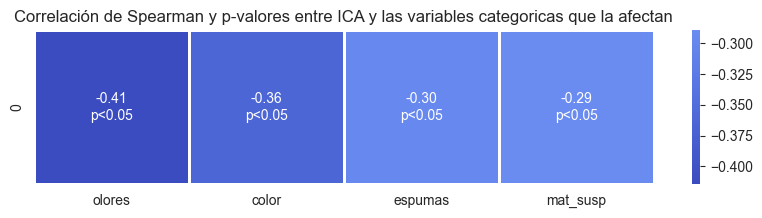

In [37]:
from scipy.stats import mannwhitneyu

#Variables categoricas que afectan al ica
boolean_columns = ['olores', 'color', 'espumas', 'mat_susp']
ica_column = 'ica'
data = df_completo[boolean_columns + [ica_column]].copy()

# Convertir a numérico y filtrar NaN
data[boolean_columns + [ica_column]] = data[boolean_columns + [ica_column]].apply(pd.to_numeric, errors='coerce')
data = data.dropna()
print(data.info())

from scipy.stats import spearmanr

corr_values = []
corr_pvalues = []
# Calcular correlación de Spearman
for muestra in boolean_columns:
    corr, p_value = spearmanr(data[muestra], data['ica'])
    corr_values.append(corr)
    corr_pvalues.append(p_value)
    # print(f"Correlación de Spearman entre {bacteria} e ICA: {corr}, p-valor: {p_value}")

# Crear el DataFrame de correlación (una fila y tres columnas)
corr_matrix = pd.DataFrame(corr_values, index=boolean_columns).T
p_matrix = pd.DataFrame(corr_pvalues, index=boolean_columns).T

# Crear un DataFrame de anotaciones combinando la correlación y el p-valor en cada celda
annotations = corr_matrix.copy()
annotations = annotations.astype(object)
for row in annotations.index:
    for col in annotations.columns:
        corr = corr_matrix.loc[row, col]
        p = p_matrix.loc[row, col]
        annotations.loc[row, col] = f'{corr:.2f}\n{"p>0.05" if p > 0.05 else "p<0.05"}'  # Formato para mostrar p-valor en notación científica

# Graficar el mapa de calor con anotaciones de correlación y p-valores
plt.figure(figsize=(10, 2))
sns.heatmap(corr_matrix, annot=annotations, fmt="", cmap='coolwarm', center=0, cbar=True, linewidths=2)
plt.title("Correlación de Spearman y p-valores entre ICA y las variables categoricas que la afectan")
plt.show()



Se analizó la relación entre la variable ICA y cuatro factores: olores, color, espumas y materia suspendida (mat_susp), utilizando el test de correlación de Spearman, dado que los datos no siguen una distribución normal.

Los resultados mostraron que todas las variables están significativamente correlacionadas con el ICA, ya que los p-valores fueron menores a 0.05, lo que indica que rechazamos la hipótesis nula en todos los casos. Además, los coeficientes de correlación de Spearman fueron negativos para todas las variables, lo que sugiere una relación negativa: a medida que la presencia de olores, color, espumas o materia suspendida aumenta, el valor de ICA tiende a disminuir.

La correlación más fuerte se observó entre ICA y olores (
p=-0.41), indicando una relación moderada.
Las correlaciones entre ICA y color (p=-0.36),espumas (p=-0.30) y
mat_susp (p=-0.29) fueron más débiles, pero igualmente significativas.

En resumen, existe una relación negativa moderada a débil entre ICA y las variables olores, color, espumas y materia suspendida, lo que sugiere que la presencia de estas características está asociada con valores más bajos de ICA. Aunque las correlaciones no son muy fuertes, los resultados son estadísticamente significativos y proporcionan evidencia de que estas variables tienen un efecto negativo sobre ICA.

#HIPOTESIS: sobre contaminacion quimica
en esta hipotesis se tratara de comprobar la relacion entre el ICA y las variables de contaminacion quimica "cr total mg l" y "cd total mg l"

Se decidio hacer un test t-sne para ver si se generaban clusters, lo cual podria indicar una relacion entre estas variables

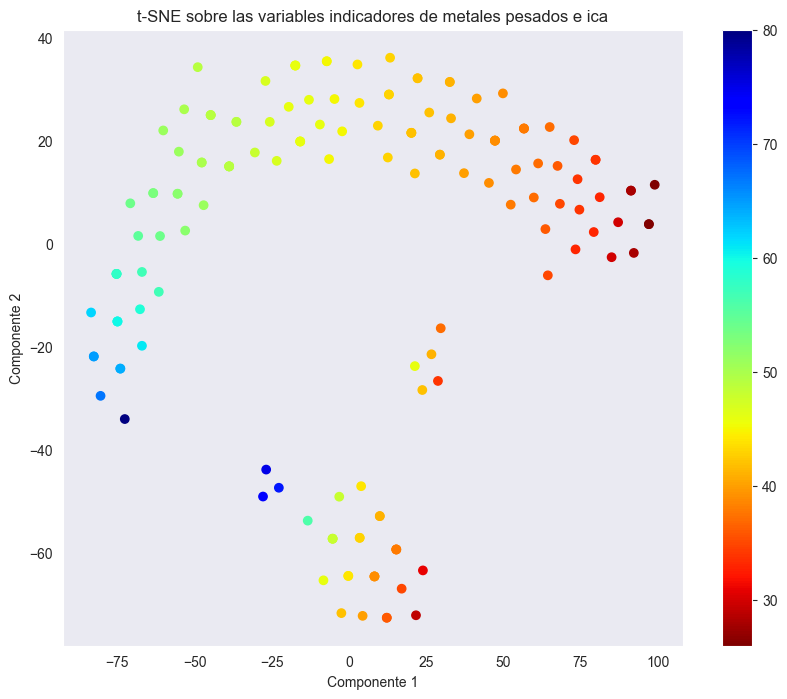

In [38]:
x = df_completo[['cr_total_mg_l','cd_total_mg_l','ica']].copy().dropna()
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Inicializar t-SNE
tsne = TSNE(n_components=2, random_state = 10)

# Ajustar y transformar los datos
X_embedded = tsne.fit_transform(x_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], cmap='jet_r', c = x['ica'])
plt.title('t-SNE sobre las variables indicadores de metales pesados e ica')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar()
plt.grid()
plt.show()

A modo de exploracion vamos a realizar un bplot

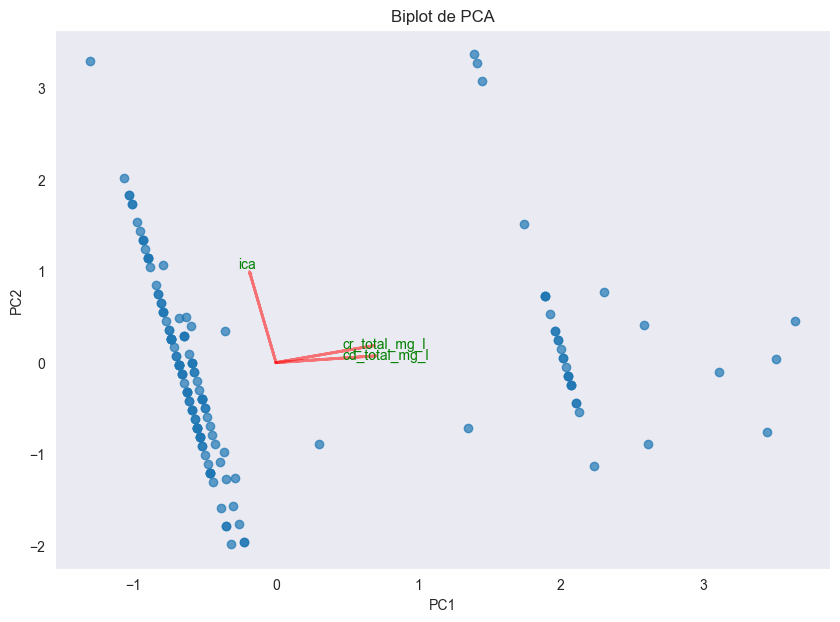

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supongamos que df es tu DataFrame y tienes variables 'cr_total_mg_l' y 'cd_total_mg_l' además de 'ica'
df = df_completo[['cr_total_mg_l', 'cd_total_mg_l', 'ica']].dropna()

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Crear el biplot
plt.figure(figsize=(10, 7))

# Graficar los puntos proyectados en las dos primeras componentes principales
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')

# Agregar las "cargas" de las variables
for i, feature in enumerate(['cr_total_mg_l', 'cd_total_mg_l', 'ica']):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='red', alpha=0.5, lw=2)
    plt.text(pca.components_[0, i] * 1.1, pca.components_[1, i] * 1.1, feature, color='green', ha='center', va='center')

# Título y visualización del gráfico
plt.title('Biplot de PCA')
plt.grid()
plt.show()


a partir de este grafico podemos decir que, la variable que mas afecta a las observaciones es el ICA, como el angulo del ICA es mayor a 90 podemos decir que la correlacion que va a tener es inversa osea, a mmayor cantidad de las otras variables disminuye el ICA, tambien por el poco angulo entre cadmio y cromo podemos deducir que estas variables estan fuertemente relacionadas,posiblemente se generen a partir de los mismo desechos, a su vez podemos ver que la longitud de los vectores es corta lo cual implica que los datos no varian mucho

con el tsne se vio que se formaban clusters por lo que procedimos a seguir con el analisis

Se decidio crear unos graficos de densidad  

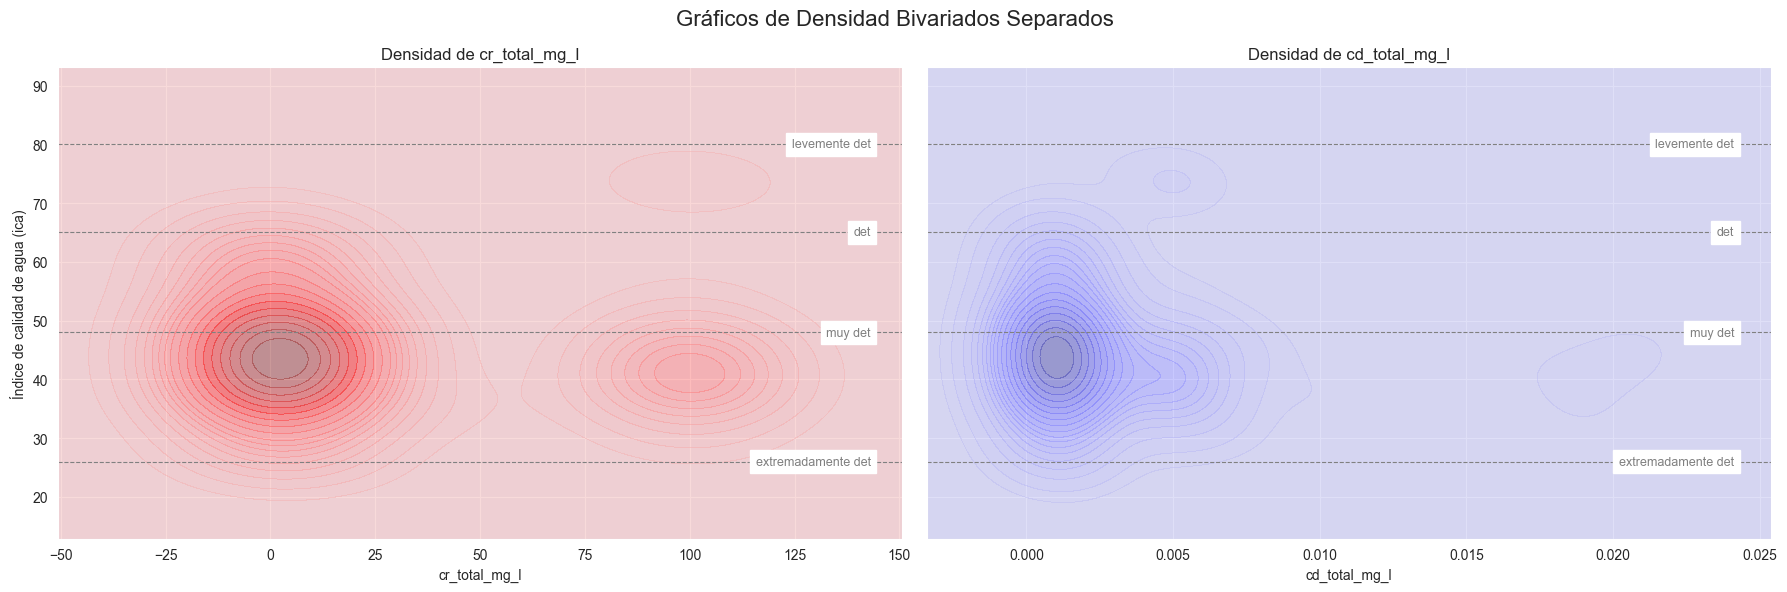

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos las variables de análisis:
colores = ['red', 'blue']  # Asignamos un color a cada variable
indices_deseados = [26,48,65,80] #Límites de clasificación de calidad de agua en el eje y (índice ica)
nombres = ['extremadamente det','muy det','det','levemente det'] #Escribimos los nombres para una mejor comprension del grafico

# Creamos una figura con 3 gráficos en línea para cada variable de interés
fig, axs = plt.subplots(1, 2, figsize=(18, 6), sharey=True)  # 1 fila, 2 columnas con el eje y compartido

variables_x = ['cr_total_mg_l','cd_total_mg_l']

# Recorremos las variables y las graficamos con sus respectivos colores y transparencias
for i, variable in enumerate(variables_x):
    sns.kdeplot(
        x=df_completo[variable],
        y=df_completo['ica'],
        color=colores[i],
        fill=True,
        thresh=0,
        levels=20,
        alpha=0.5,  # Transparencia del gráfico de densidad
        ax=axs[i]  # Plotea en el eje correspondiente
    )
    axs[i].set_title(f'Densidad de {variable}')
    axs[i].set_xlabel(variable)
    for y_val,nombre in zip(indices_deseados,nombres):
            axs[i].axhline(y=y_val, color='gray', linestyle='--', linewidth=0.8)

            axs[i].text(x=axs[i].get_xlim()[1] * 0.95, y=y_val, s=nombre,
                            color='gray', va='center', ha='right', fontsize=9,
                            backgroundcolor='white')

# Configuramos el eje y compartido y el título de toda la figura
axs[0].set_ylabel('Índice de calidad de agua (ica)')
fig.suptitle('Gráficos de Densidad Bivariados Separados', fontsize=16)

# Ajustamos el diseño para una mejor visualizacion del grafico y lo mostramos
plt.tight_layout()
plt.show()


Vamos a analizar la normalidad de las variables relacionadas con el cadmio y el cromo, aunque ya sepamos que el ICA no sigue una distribucion normal.

In [41]:
from scipy.stats import shapiro

print('cromo')
stat, p_value = shapiro(df_completo['cr_total_mg_l'].dropna())
print(f'Estadístico Shapiro-Wilk: {stat}, p-valor: {p_value}')

if p_value > 0.05:
    print("La variable cr_total_mg_l sigue una distribución normal.")
else:
    print("La variable cr_total_mg_l no sigue una distribución normal.")

print('cadmio')
stat, p_value = shapiro(df_completo['cd_total_mg_l'].dropna())
print(f'Estadístico Shapiro-Wilk: {stat}, p-valor: {p_value}')

if p_value > 0.05:
    print("La variable cd_total_mg_l sigue una distribución normal.")
else:
    print("La variable cd_total_mg_l no sigue una distribución normal.")


cromo
Estadístico Shapiro-Wilk: 0.5372402927705173, p-valor: 8.072726235105501e-20
La variable cr_total_mg_l no sigue una distribución normal.
cadmio
Estadístico Shapiro-Wilk: 0.45290127665727187, p-valor: 2.0030148659666123e-21
La variable cd_total_mg_l no sigue una distribución normal.


In [42]:
from scipy.stats import levene

# Lista de variables bacterianas
df_quimica =df_completo[['ica','cr_total_mg_l', 'cd_total_mg_l']].copy().dropna()

# Test de Levene para homocedasticidad
stat, p_value = levene(df_quimica['cr_total_mg_l'], df_quimica['cd_total_mg_l'], df_quimica['ica'])
print("Estadístico de Levene:", stat)
print("Valor p:", p_value)


Estadístico de Levene: 33.2062849620693
Valor p: 3.5848357806342314e-14


podemos ver que estas variables no siguen una distribucion normal,ademas de no visualizar que tampoco tenemos datos homecedasticos, por lo tanto vamos a aplicar el test de Kruskal

In [43]:
from scipy.stats import kruskal

# Lista de variables bacterianas
df_quimica =df_completo[['ica','cr_total_mg_l', 'cd_total_mg_l']].copy().dropna()


stat, p_value = kruskal(df_quimica['cr_total_mg_l'],df_quimica['cd_total_mg_l'],df_quimica['ica'])
print(stat)
print(p_value)

313.30756201547894
9.249693435339817e-69


podemos ver que el p valor de kruskal es menor a 0.05 por lo tanto se rechaza la hipotesis nula y se confirma la hipotesis que planteamos y con un nivel de confianza alto

#Hipotesis a mayor presencia de oxigeno disuelto mejor calidad del agua
Esta hipotesis se basa en que, la presencia de oxigeno en el agua  es benefica para la vida y por lo tanto tambien lo es para la calidad del el agua

Se realiza un grafico para ver si hay una relacion lineal entre las variables

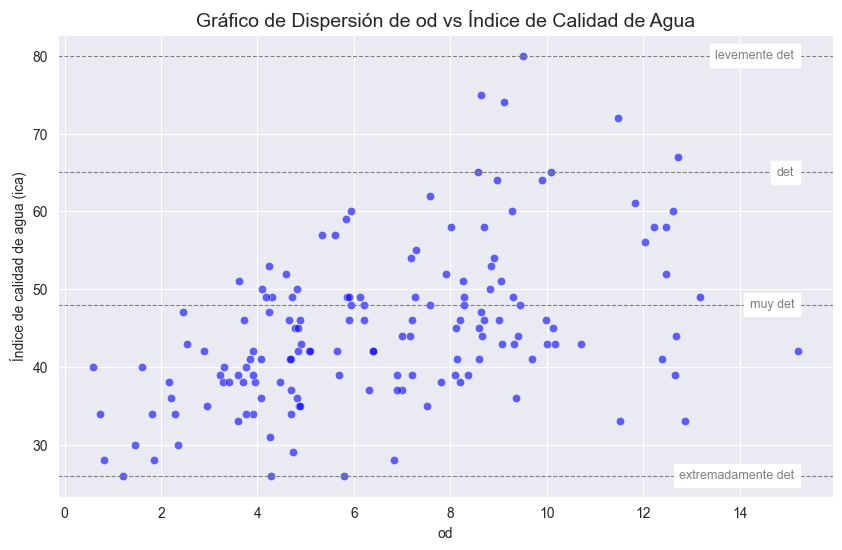

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos los límites de clasificación de calidad de agua y sus nombres
indices_deseados = [26, 48, 65, 80]
nombres = ['extremadamente det', 'muy det', 'det', 'levemente det']

# Configuramos la figura para el gráfico de dispersión
plt.figure(figsize=(10, 6))

# Gráfico de dispersión
sns.scatterplot(
    x=df_completo['od'],
    y=df_completo['ica'],
    color='blue',
    alpha=0.6
)

# Agregamos líneas de límites de calidad de agua en el gráfico de dispersión
for y_val, nombre in zip(indices_deseados, nombres):
    plt.axhline(y=y_val, color='gray', linestyle='--', linewidth=0.8)
    plt.text(
        x=plt.gca().get_xlim()[1] * 0.95, y=y_val, s=nombre,
        color='gray', va='center', ha='right', fontsize=9,
        backgroundcolor='white'
    )

# Configuramos la línea manual en el gráfico de dispersión
x_vals = plt.gca().get_xlim()  # Obtenemos los límites del eje x
y_vals = [0, 80]  # Valores en el eje y para la línea

# Configuraciones adicionales para el gráfico de dispersión
plt.title('Gráfico de Dispersión de od vs Índice de Calidad de Agua', fontsize=14)
plt.xlabel('od')
plt.ylabel('Índice de calidad de agua (ica)')

# Mostrar el gráfico
plt.show()


A partir del grafico se puede ver que la relacion de las variables tiene una tendencia, a ser lineal es decir, a medida que aumenta los valores de la variable od, tambien aumentan los valores de la variable ICA, al haber una tendencia lineal entre las variables, se realiza una regresion lineal para comprobar la hipotesis

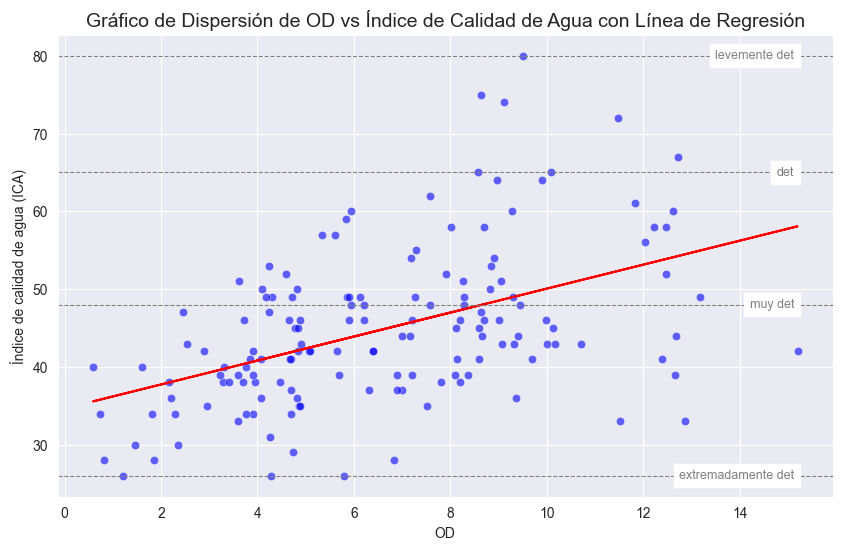

Pendiente (slope): 1.5405394733196127
Coeficiente de correlación (r): 0.4740216218424515
Valor p (p-value): 8.947627657946876e-10
Error estándar (std_err): 0.2352229509356028


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np

# Definimos los límites de clasificación de calidad de agua y sus nombres
indices_deseados = [26, 48, 65, 80]
nombres = ['extremadamente det', 'muy det', 'det', 'levemente det']
#elimino los nan
df_oxigeno = df_completo[['od','ica']].copy().dropna()

# Obtenemos la regresión lineal de OD e ICA
slope, intercept, r_value, p_value, std_err = linregress(df_oxigeno['od'], df_oxigeno['ica'])

# Configuramos el gráfico
plt.figure(figsize=(10, 6))

# Gráfico de dispersión de OD vs ICA
sns.scatterplot(
    x=df_oxigeno['od'],
    y=df_oxigeno['ica'],
    color='blue',
    alpha=0.6
)

# Agregamos la línea de regresión usando la ecuación y=ax+b
x_vals = np.array(df_oxigeno['od'])
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red')

# Agregamos líneas de límites de calidad de agua
for y_val, nombre in zip(indices_deseados, nombres):
    plt.axhline(y=y_val, color='gray', linestyle='--', linewidth=0.8)
    plt.text(
        x=plt.gca().get_xlim()[1] * 0.95, y=y_val, s=nombre,
        color='gray', va='center', ha='right', fontsize=9,
        backgroundcolor='white'
    )

# Configuraciones adicionales para el gráfico
plt.title('Gráfico de Dispersión de OD vs Índice de Calidad de Agua con Línea de Regresión', fontsize=14)
plt.xlabel('OD')
plt.ylabel('Índice de calidad de agua (ICA)')
plt.show()

# Imprimimos los coeficientes y la relación
print(f"Pendiente (slope): {slope}")
print(f"Coeficiente de correlación (r): {r_value}")
print(f"Valor p (p-value): {p_value}")
print(f"Error estándar (std_err): {std_err}")


Podemos ver que a traves del analisis de la regresion lineal se llegaron a varias conclusiones que le dan fuerza a la hipotesis,
podemos ver que el valor de la pendiente es positivo, por lo que confirma que la tendencia es que a mayores valores de oxigeno mayores valores del ica
podemos ver que el coeficiente de correlacion esta cerca del 1 lo que indica una correlacion positiva
luego vemos que el valor P pequeño lo que niega la hipotesis nula de que el oxigeno disuelto no afecta en la calidad del agua y se confirma que el oxigeno disuelto si afecta.